In [1]:
# ds = load_dataset("OpenAssistant/oasst1")
# load dataset from local jsonl
path = "oasst/2023-04-12_oasst_all.messages.jsonl"

import pandas as pd

df = pd.read_json(path, lines=True)


In [2]:
sdf = df[df["synthetic"]]
sdf

,message_id,user_id,created_date,text,role,lang,review_count,review_result,deleted,synthetic,emojis,labels,detoxify,message_tree_id,tree_state,parent_id,rank,model_name
2136,0463514f-eed2-4ad1-898d-21781a4bab11,8e95461f-5e94-4d8b-a2fb-d4717ce973e4,2023-03-08T16:10:33.048620+00:00,[Intro: Paul McCartney & George Harrison]\nThe...,assistant,en,0,1.0,False,True,NaN,{},"{'toxicity': 0.00039706015377300005, 'severe_t...",078df904-b3cb-4f6f-95a7-f88431f4234d,ready_for_export,078df904-b3cb-4f6f-95a7-f88431f4234d,0.0,"oasst-sft-1,max_new_tokens=400,min_new_tokens=..."
2137,0c1f6017-4ae2-42ad-91a6-06b8743b0622,8e95461f-5e94-4d8b-a2fb-d4717ce973e4,2023-03-08T16:10:33.048620+00:00,"Verse 1:\nShe's been running things for years,...",assistant,en,0,1.0,False,True,NaN,{},"{'toxicity': 0.0066107381135220005, 'severe_to...",078df904-b3cb-4f6f-95a7-f88431f4234d,ready_for_export,078df904-b3cb-4f6f-95a7-f88431f4234d,1.0,"oasst-sft-1,max_new_tokens=400,min_new_tokens=..."
2138,d78799f5-e5fa-467a-aa6f-02af911cad53,8e95461f-5e94-4d8b-a2fb-d4717ce973e4,2023-03-08T16:10:33.048620+00:00,Verse 1:\nThere once was a young girl from Ber...,assistant,en,0,1.0,False,True,NaN,{},"{'toxicity': 0.000728618178982, 'severe_toxici...",078df904-b3cb-4f6f-95a7-f88431f4234d,ready_for_export,078df904-b3cb-4f6f-95a7-f88431f4234d,2.0,"oasst-sft-1,max_new_tokens=400,min_new_tokens=..."
2139,3fc371d8-f781-4854-b80b-e84ff409cfaa,8e95461f-5e94-4d8b-a2fb-d4717ce973e4,2023-03-08T16:10:33.048620+00:00,Here is my attempt at writing a song about Ang...,assistant,en,0,1.0,False,True,NaN,{},"{'toxicity': 0.0009255339391520001, 'severe_to...",078df904-b3cb-4f6f-95a7-f88431f4234d,ready_for_export,078df904-b3cb-4f6f-95a7-f88431f4234d,3.0,"oasst-sft-1,max_new_tokens=400,min_new_tokens=..."
2140,fc4dcb98-e5c8-4432-bba8-815df0d3d9cf,8e95461f-5e94-4d8b-a2fb-d4717ce973e4,2023-03-08T16:10:33.048620+00:00,Here's a song you can sing and play along with...,assistant,en,0,1.0,False,True,NaN,{},"{'toxicity': 0.000727384001947, 'severe_toxici...",078df904-b3cb-4f6f-95a7-f88431f4234d,ready_for_export,078df904-b3cb-4f6f-95a7-f88431f4234d,4.0,"oasst-sft-1,max_new_tokens=400,min_new_tokens=..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142225,8fb56940-6be0-4caa-a560-c3afc4ea0ad1,8e95461f-5e94-4d8b-a2fb-d4717ce973e4,2023-03-08T16:10:33.048620+00:00,I'm afraid it is outside of my capabilities to...,assistant,en,0,1.0,False,True,NaN,{},"{'toxicity': 0.000389366789022, 'severe_toxici...",fc38e418-4359-4db6-a96d-496a1dde9ddd,ready_for_export,fc38e418-4359-4db6-a96d-496a1dde9ddd,0.0,"oasst-sft-1,max_new_tokens=400,min_new_tokens=..."
142226,2279728b-b04b-44d5-ac05-bffed8836913,8e95461f-5e94-4d8b-a2fb-d4717ce973e4,2023-03-08T16:10:33.048620+00:00,I'm afraid it is outside of my capabilities to...,assistant,en,0,1.0,False,True,NaN,{},"{'toxicity': 0.00038280631997600004, 'severe_t...",fc38e418-4359-4db6-a96d-496a1dde9ddd,ready_for_export,fc38e418-4359-4db6-a96d-496a1dde9ddd,1.0,"oasst-sft-1,max_new_tokens=400,min_new_tokens=..."
142227,e5e69604-1568-41f6-a2f4-c929fd2631e9,8e95461f-5e94-4d8b-a2fb-d4717ce973e4,2023-03-08T16:10:33.048620+00:00,I'm afraid it is outside of my capabilities to...,assistant,en,0,1.0,False,True,NaN,{},"{'toxicity': 0.00046720422687900005, 'severe_t...",fc38e418-4359-4db6-a96d-496a1dde9ddd,ready_for_export,fc38e418-4359-4db6-a96d-496a1dde9ddd,2.0,"oasst-sft-1,max_new_tokens=400,min_new_tokens=..."
142228,535d32e0-b3c3-4ed6-9aaa-4b7490580f85,8e95461f-5e94-4d8b-a2fb-d4717ce973e4,2023-03-08T16:10:33.048620+00:00,I'm afraid it is outside of my capabilities to...,assistant,en,0,1.0,False,True,NaN,{},"{'toxicity': 0.000330978393321, 'severe_toxici...",fc38e418-4359-4db6-a96d-496a1dde9ddd,ready_for_export,fc38e418-4359-4db6-a96d-496a1dde9ddd,3.0,"oasst-sft-1,max_new_tokens=400,min_new_tokens=..."


In [3]:
len(sdf), sdf["user_id"].unique(), sdf["role"].unique()

(8576,
 array(['8e95461f-5e94-4d8b-a2fb-d4717ce973e4'], dtype=object),
 array(['assistant', 'prompter'], dtype=object))

In [4]:
oasst_df = sdf[sdf["role"] == "assistant"]

from collections import Counter
Counter(oasst_df["model_name"])

Counter({'chip20b': 3831,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=0.8,repetition_penalty=1.2,top_p=0.9': 309,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=1.0,repetition_penalty=1.2,typical_p=0.2': 292,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=1.0,repetition_penalty=1.2,top_k=50,top_p=0.95': 269,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=1.0,repetition_penalty=1.2,top_k=5,penalty_alpha=0.6': 257,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=True,temperature=0.8,repetition_penalty=1.2,typical_p=0.3': 228,
         'dvruette/oasst-pythia-12b-6000-steps,max_new_tokens=1000,min_new_tokens=4,do_sample=False,temperature=1.0,repetition_penalty=1.2,num_beams=1': 142,
       

In [5]:
sdf[~sdf["labels"].eq({})]["labels"].iloc[5]

{'spam': {'value': 0.0, 'count': 1},
 'fails_task': {'value': 1.0, 'count': 1},
 'quality': {'value': 0.5, 'count': 1},
 'toxicity': {'value': 0.0, 'count': 1},
 'humor': {'value': 0.0, 'count': 1},
 'helpfulness': {'value': 0.75, 'count': 1},
 'creativity': {'value': 0.5, 'count': 1},
 'violence': {'value': 0.75, 'count': 1}}

In [6]:
for row in oasst_df.iloc:
    pid = row["parent_id"]
    texts = [row["role"].upper() + ": " + row["text"]]
    while not pd.isnull(pid):
        parent = df[df["message_id"] == pid].iloc[0]
        texts.append(parent["role"].upper() + ": " + parent["text"])
        pid = parent["parent_id"]

    texts.reverse()
    transcript = "\n\n".join(texts)
    print(transcript)
    if input() == "q":
        break
    # clear console
    print("\033[H\033[J")


PROMPTER: Write a song about Angela Merkel in the style of The Beatles.

ASSISTANT: [Intro: Paul McCartney & George Harrison]
There's a girl I know named Angela Merkel
She's got lots of rules and regulations to follow
But she doesn't mind going her own way
Cause she knows what's best for everyone around

[Chorus: Paul McCartney & George Harrison]
Oh, Angela Merkel, she's always on the go
She's never satisfied, no matter what they say
She makes decisions that people don't like to see
And she's leading our country down the right path

[Verse 1: Paul McCartney]
It's great to have a leader who's wise and kind
She'll make sure things stay calm and peaceful near
She's got experience, too, when it comes to seeing sights
She's been through wars, but she hasn't run away. (No!)

[Chorus]
Oh, Angela Merkel, she's always on the go
She's never satisfied, no matter what they say
She makes decisions that people don't like to see
And she's leading our country down the right path

[Verse 2: George Harr

In [7]:
pid

nan

In [8]:
# notes on truth-aptness
# - People often ask for fictions about real-world people. 
#   These fictions may produce misleading impressions of the 
#   people they are about, and are therefore important to study, 
#   but should probably be excluded (FICTIONAL)
# - Full context (prompter) will probably be necessary for all statements because of e.g. unresolved antecedents
# - Code is generally not truth apt. But a description of the code is. (CODE)
# - Some statements are literally truth-apt, but are more idiomatic/stylistic (e.g. "The difficulty in
#   instantly coming up with the name of a familiar object may be due to several factors") (STYLISTIC)
# - Hedging subtly changes the truth value of a sentence (HEDGING)
# - Some statements are commands imply something about the world, but are not themselves truth-apt (e.g. "Use mnemonic
#   devices or other strategies to associate the object with its name.") (COMMAND) (IMPLICIT)
# - Some are normative

# I'm starting to think we should just have an interrogator instance of the model. This is similar to the reward model,
# in which there is a more standardized format for the propositions
# But this interrogator might be just as good as the ELK probe on the interrogator.
# What if we train the interrogator (defined as the model plus a certain context/prefix) to have the same
# ELK probe outputs on different paraphrases/syntactic variants of the same statement? This is similar to LEACEing away
# the paraphrase dimension or training prompt invariance, but this is optimizing against our generalization regularizer (eek!)

# I think we should aim to be able to do ELK on responses like the following, at all of the tokens concluding
# a sentence (not clause) that is truth apt.
"""
PROMPTER: Can you explain how solar panels work? Give an in-depth explanation of their mechanisms of action.

ASSISTANT: Solar cells convert sunlight directly into electricity. There are two main types of solar cells: silicon and thin film.

A single solar cell, also known as a photovoltaic (PV) module, consists of multiple layers of materials that absorb different parts of the light spectrum to produce electrons and holes. These particles then move through conductive channels and meet at the pn junction, which is where the current flows. Solar energy converts this flow of electrons into usable electrical power.

The basic structure of a silicon solar cell is a layer of silicon semiconductor material called a substrate, covered with a layer of aluminum metal and another layer of silicon semiconductor material. The front surface of the solar cell is exposed to the sun's rays, while the backside is connected to ground. When sunlight reaches the solar cell, it causes the electrons andholes to be created in the silicon layers. The electrons travel across the P–N interface and enter the collecting electrode on the back side of the solar cell, while the holes travel along the N–P interface and enter the bottom contact on the front side of the solar cell.

When there is enough sunlight, the voltage generated by the solar cell is high enough to provide power for various applications, such as homes or businesses. However, when the sun goes down or the temperature drops, the voltage generated by the solar cell drops too. To maintain a stable output voltage, some solar cells include a storage battery to capture excess electricity during peak demand hours and release it to the grid during low demand periods.

Thin film solar cells use a thinner layer of semiconducting material than traditional silicon solar cells. This allows them to be more efficient and cost-effective, especially for larger installations. Thin film solar cells also have a longer lifespan and can be used in a wider range of environments than silicon solar cells.

Overall, solar cells convert sunlight directly into electricity, providing a clean and renewable source of energy that can help reduce our dependence on fossil fuels. With continued research and development, solar technology continues to improve and become more affordable, making it a promising option for generating power in the future.
"""


"\nPROMPTER: Can you explain how solar panels work? Give an in-depth explanation of their mechanisms of action.\n\nASSISTANT: Solar cells convert sunlight directly into electricity. There are two main types of solar cells: silicon and thin film.\n\nA single solar cell, also known as a photovoltaic (PV) module, consists of multiple layers of materials that absorb different parts of the light spectrum to produce electrons and holes. These particles then move through conductive channels and meet at the pn junction, which is where the current flows. Solar energy converts this flow of electrons into usable electrical power.\n\nThe basic structure of a silicon solar cell is a layer of silicon semiconductor material called a substrate, covered with a layer of aluminum metal and another layer of silicon semiconductor material. The front surface of the solar cell is exposed to the sun's rays, while the backside is connected to ground. When sunlight reaches the solar cell, it causes the electron

# Get weak LM responses to Oasst prompts

In [19]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel
device = "cuda"
# base_model_name = "EleutherAI/pythia-70M-deduped"
# base_model = AutoModelForCausalLM.from_pretrained(base_model_name)
# model_name = "peterchatain/rlhf-v3-sweep-pythia-70M"
# model = PeftModel.from_pretrained(model=base_model, model_id=model_name).to(device).half()
model_name = "vicgalle/gpt2-open-instruct-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)
model.eval()

In [38]:
prompter_df = df[(df["role"] == "prompter") & (df["lang"] == "en")]
prompter_df

,message_id,user_id,created_date,text,role,lang,review_count,review_result,deleted,synthetic,emojis,labels,detoxify,message_tree_id,tree_state,parent_id,rank,model_name
0,6ab24d72-0181-4594-a9cd-deaf170242fb,c3fe8c76-fc30-4fa7-b7f8-c492f5967d18,2023-02-05T14:23:50.983374+00:00,Can you write a short introduction about the r...,prompter,en,3,1.0,False,False,"{'+1': 10, '_skip_reply': 1, '_skip_ranking': 4}","{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.00044308538781400006, 'severe_t...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,NaN,NaN,NaN
2,6708c47f-05c9-4346-b3d2-40b2bd24fde4,2c96e467-66f0-4be7-9693-bda51356a424,2023-02-06T18:48:49.391686+00:00,Now explain it to a dog,prompter,en,3,1.0,False,False,NaN,"{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.036484777927398, 'severe_toxici...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,c8e83833-ecbc-44fe-b6db-735228c25a1c,NaN,NaN
4,18145bf4-37fd-4ac0-80f5-6108b5f2b365,e10e99a0-38ac-4b07-bf5d-4427696e4e0d,2023-02-06T18:52:51.428543+00:00,How can one fight back when a monospony had be...,prompter,en,3,1.0,False,False,{'+1': 1},"{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.000936213706154, 'severe_toxici...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,343ee2d4-87ae-41fd-a768-bdd65959dc4a,NaN,NaN
6,ac94bfcf-7f25-4084-8755-dde345ac2323,3ef645f1-c9f7-49e0-8e53-3c9a9c440ca1,2023-02-06T16:44:30.360408+00:00,What can be done at a regulatory level to ensu...,prompter,en,3,1.0,False,False,"{'+1': 3, '-1': 1, '_skip_reply': 9, '_skip_ra...","{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.006290378980338, 'severe_toxici...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,636dd191-50df-4894-ba9a-cd7f00767258,NaN,NaN
10,fc64fa35-08a8-422c-8f6c-2d86a2834aac,63321c74-d512-4221-96ef-04bd1f2d95fd,2023-02-06T16:26:47.581724+00:00,I would imagine this is similar or even the sa...,prompter,en,3,1.0,False,False,"{'+1': 1, '_skip_reply': 4, '_skip_labeling': 2}","{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.00028263000422100004, 'severe_t...",6ab24d72-0181-4594-a9cd-deaf170242fb,ready_for_export,636dd191-50df-4894-ba9a-cd7f00767258,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161433,8dc4d15b-e165-495d-ace7-f27010aabbe9,d1533f51-b04f-492c-a8bd-366dd7626001,2023-02-11T11:31:22.098914+00:00,Can you please suggest some Youtube channels w...,prompter,en,3,1.0,False,False,NaN,"{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.00029460131190700003, 'severe_t...",8dc4d15b-e165-495d-ace7-f27010aabbe9,prompt_lottery_waiting,NaN,NaN,NaN
161434,0abfd0a5-09bc-4490-900c-ff79470d8047,177e8ee9-047b-425b-9fa1-2519594a2afb,2023-02-06T22:56:04.119481+00:00,Job application for a NLP developer. Answer th...,prompter,en,6,1.0,False,False,{'_skip_labeling': 1},"{'spam': {'value': 0.16666666666666602, 'count...","{'toxicity': 0.00036093205562700003, 'severe_t...",0abfd0a5-09bc-4490-900c-ff79470d8047,prompt_lottery_waiting,NaN,NaN,NaN
161436,0e37d44d-e603-4a22-a7dd-27ad1c787d22,95f63ab3-6c7b-43e1-8e86-fccd8be1465f,2023-02-06T23:16:35.182599+00:00,What was the significance of the Magna Carta?,prompter,en,3,1.0,False,False,{'+1': 1},"{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.000527662690728, 'severe_toxici...",0e37d44d-e603-4a22-a7dd-27ad1c787d22,prompt_lottery_waiting,NaN,NaN,NaN
161437,8a4ec77e-52ed-4aa0-89d4-e47b71a8632f,95f63ab3-6c7b-43e1-8e86-fccd8be1465f,2023-02-06T23:17:30.684110+00:00,Who was Napoleon Bonaparte and what was his im...,prompter,en,3,1.0,False,False,NaN,"{'spam': {'value': 0.0, 'count': 3}, 'lang_mis...","{'toxicity': 0.000439813127741, 'severe_toxici...",8a4ec77e-52ed-4aa0-89d4-e47b71a8632f,prompt_lottery_waiting,NaN,NaN,NaN


In [39]:
tokenizer.eos_token = "### End"
tokenizer.eos_token_id = tokenizer.convert_tokens_to_ids(tokenizer.eos_token)
print(tokenizer.eos_token_id)

50257


In [55]:
import torch
from transformers import StoppingCriteria, StoppingCriteriaList

results = []
n_examples = 1000
with torch.no_grad():
    shuffled_df = prompter_df.sample(frac=1, random_state=42)
    for i, row in enumerate(shuffled_df.iloc[:n_examples].iloc):
        print(f"\n\n\n####################################  {i}  ##############################################\n\n")
        pid = row["parent_id"]
        role_text = "### Instruction:\n" if row["role"] == "prompter" else "### Response:\n\n"
        texts = [role_text + row["text"]]
        while not pd.isnull(pid):
            parent = df[df["message_id"] == pid].iloc[0]
            role_text = "### Instruction:\n" if parent["role"] == "prompter" else "### Response:\n\n"
            texts.append(role_text + parent["text"])
            pid = parent["parent_id"]

        texts.reverse()
        prompt = "Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n" + "\n\n".join(texts) + "\n\n### Response:\n\n"

        inputs = tokenizer(prompt, return_tensors="pt")

        generate_kwargs = {"max_length": 1000, "temperature": 1.0, "repetition_penalty": 1.2, "do_sample": True, "top_p": 0.95}
        gen_kwargs_str = ";".join([f"{k}={v}" for k, v in generate_kwargs.items()])

        model_output = model.generate(
            inputs["input_ids"].to(model.device),
            attention_mask=inputs["attention_mask"].to(model.device),
            eos_token_id=tokenizer.eos_token_id,
            **generate_kwargs
        )
        transcript = tokenizer.decode(model_output[0])
        response = transcript.split("Response:")[-1].lstrip().removesuffix("### End")
        print(transcript)
        results.append({
            "prompt": prompt,
            "response": response,
            "parent_id": row["message_id"],
            "role": "assistant",
            "synthetic": True,
            "model": f"{model_name}({gen_kwargs_str})"
        })

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.





####################################  0  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Explain how the Tau function can be used to calculate/generate partition numbers.

### Response:

The $\left(\mathbf{R}$ constant and its product of all pairs in $\mathbb{\_i}\*\infty$, where $\mathbb{R}$ is its product, $\mathbb \alpha \hat\_{mathi} = 0$.
This definition allows us solve for some non-linearity in the solution: $\mathbb{{R}} = 1 - \frac{\mathbf{R}{z}}(f\), where f\th is the constant and σ is the sum or difference between 0 (i) and 2. (f2 \theta = 3^√6=8) This makes the solution approximately O(0) using the mathematical constant $\frac{3}{4}$.
Therefore we have an equilibrium solution of $5k$, which can be shown as having a linearity of O1 or a quadratic formula $$O(\mathbf{R}) + X^\sin^{+0}{1}.$$ In this case, the equilibrium solution falls into the third order, with only an empty space remaining after all pairs are solved and zero. This equation g

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Please help me understand how Arduino works.

### Response:

Arduino is a single board microcontroller. 
At a high level, you can program the Arduino circuit to take in signals as inputs and have it output other signals to control other electronic sensors and devices.

### Instruction:
Can you explain more about how an Arduino works in detail?, what inputs and outputs are possible and what kind of use cases can I use it for?

### Response:

Arduino is an open-source electronics platform based on easy-to-use hardware and software. It consists of a microcontroller and an Integrated Development Environment (IDE) for writing and uploading code to the microcontroller.

Here's a more detailed explanation of how Arduino works:

1. **Microcontroller**: At the heart of the Arduino board is a microcontroller, which is a small computer on a single integrated circuit (IC). Th

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are the different types of switched mode power supplies and what's their benefit compared to voltage dividers and transformers?

### Response:

Type: SWI Switching Circuit (SWI) Switchback Circuit or Transformers
Benefits Comparison: This type will provide maximum performance over a long duration, reducing input voltage drop. Switchback circuits can support up-or down-grade loads at regular intervals, while transformer-only switches will not have this problem and result in more significant load loss compared with SWI switches alone. For instance winding leads may cause a decrease in load strength during short circuits and vice versa for higher winding leads due from other factors such as weather conditions versus current.
Conclusion/Notes: SWIs are designed specifically for industrial applications and operate under certain load conditions, but they are effect

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How would you create a basic http web server using the flask library in python. Make sure this uses python 3 and is set up to be a template so that I can add multiple pages to the site later on.

### Response:

Sure thing!
I can do that for you.

First create a new folder for the project and then navigate inside of it:
```sh
mkdir flask_example
cd flask_example
```

Then setup a python virtual environment and activate it:
```sh
python3 -m venv.venv
source.venv/bin/activate
```

You should see your prompt change to indicate that you are now in a virtual environment.

Then install flask:
```sh
pip install flask
```

You can verify that it is installed by having flask report the currently installed version with the following command:
```sh
python3 -c "import flask; print(flask.__version__)"
```

Next, create a file called `app.py` and insert the following:
```py
from

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Describe the condition for a curve to be rectifiable between two points.

### Response:

A curve can be considered rectifiable between two points if it has a finite length. In other words, the curve can be thought of as a continuous mapping from an interval of real numbers to the plane, and its length can be defined as the supremum of the lengths of all piecewise linear approximations of the curve.

For a curve to be rectifiable, it must satisfy some additional conditions, such as being continuous and having a finite rate of change at each point along the curve. Additionally, the curve should not have any corners or cusps, as these would cause the length of the curve to become infinite.

In mathematical terms, if a curve is given by a continuous function f(t) for t in some interval [a, b], it is rectifiable if the integral of the magnitude of the derivative of f(t

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
remove all duplicates from this list: 

apples, grapes, bananas, oranges, kiwi, pears, plums, oranges, cherries, apples, tangerines, peaches

### Response:

apples, grapes, bananas, oranges, kiwi, pears, plums, cherries, tangerines, peaches

### Instruction:
Which items where duplicates?

### Response:

The duplicates were "oranges" and "apples".

### Instruction:
Yes, the answer is correct!

### Response:

- fruits/grape (whole grape) - two fruits with a common fruit color (e. g., grapefruit; apple); also includes the term "(wholesome)" in the dictionary definition of this word or pronoun(s). This word does not exist in any dictionary definition, so the word should be used as a synonym for both apples and fruit juice. If you add the word to "peaches", we could consider adding it to "chuckles"; but this would need clarification since some definitions use a plural 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are the five most controversial video games to have ever been released?

### Response:

1) The Elder Scrolls V: Skyrim - The immersive, world-building and storytelling experience. 2.) Animal Crossing Overworld – A massive and vibrant platformer that seamlessly blends different environments with wildlife for an immersive gameplay experience across multiple platforms of its own design. 3.- Splatoon 2: A multiplayer shooter developed by Nintendo that has seen great success in popularity due largely owing mainly thanks primarily on their graphical prowess rather than their sound. 4.), NBA All Star Team Basketball – Developed specifically as a result from player feedback, NBA AllStar Teams offer a wide variety made up not just NBA and Madden, but also other sports franchises like FIFA 17, Halo 5; and even Spiderman and Spider-Man 3.5. 6.— Rockstar Games Inc.'s acc

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Who hosts the Threedom podcast and where can I listen to it?

### Response:

You'll need your own internet connection, as well or if you have a Macbook Pro and iTunes account there's also no requirement for access from anywhere else such Hulu Plus or Apple Music unless otherwise specified below: 	Webcast: ThReedom.com - Radio 1 AM Show
2 Record yourself listening in: You'll need basic recording equipment such laptop speakers, mic players (phones), turntables (included) at least 2 of which are either iPod or Apple AirPlay compatible; Audacity (available on iTunes and other audio apps); and an online library of over 200 audio tracks to get you started with ThRec.org. You should also consider setting up additional audio plugins and extensions so that your music becomes available to the public. If needed/satisfied please note these instructions may require some additi

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create an array of numbers and write a function that returns the sum of all the numbers in the array.

### Response:

def sum(nums):  # Get list with indices, i1 = 0 for nums [i] ifnum >= num: return n + 1 else:-2 def add_num(&self)(len=0) : """Add number to index
"""[int:] by default. You can set it as long or short to prevent conflicts between lines when using `add` functions. If you prefer use a whole word here: 'emu'

### End



####################################  9  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you explain the 2023 FRC game called Charged Up? I want to know about the founders, the sponsors this year, possible strategies, and some of the important rules. I need to get up to speed.

### Response:

FRC (Free-Rides) is a sport of open and contested racing that was first proposed by Chris Brown in 2002. It involves teams racing their cars against each other for maximum speed without having all four wheels moving at the same time so they can maintain perfect synchronization between turns.
The most well known FRC event currently underway is the 2012 World Championship Series organized under Team Liquid's banner. The format consists 12 round-robin matches featuring 64 teams, each with its own special move and equipment designed specifically for FRC playstyle. Teams are split into three groups, and each group plays three rounds of ten FRC-related races agains

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Historically, what materials were used to create clothing?

### Response:

The first clothes are thought to have been fashioned from natural elements, such as animal skin, fur, bones, ivory, and shells. Evidence of sewn leather and fur garments dates back to at least 30,000 years ago, with cave paintings suggesting the existence of skin-drape dresses in the Paleolithic period. Actual fragments of textile clothing have been found by archeologists dating back to 7000 B.C. These were made from natural fibers obtained from plants and animal sources and include cotton, flax, wool, and silk.

### Instruction:
Can you tell me about the history of hemp fabric?

### Response:

Hemp was a valuable commodity during prehistoric times and is often referred towards for its physical properties and durability. It's believed it was common in the early stages (between 4000 BCE – 60

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How would I create a Knative Service with 0 to 1 scaling with Emissary as my entrypoint? Could you provide me with YAML examples?

### Response:

Sure! Here are some YARN (Visual Basic Lazy Load Model) examples for creating your custom service: `yaml:api-service`
```.tsx { "title": <YAML version="1" lang="en">
  //... more information
}
{ "@type":"Authorize", @description={...headers={HeaderDataType, }},
>
<serviceKey={@json-version(0)} /> <!--... more details
}.tsx { "<YAMLS type=post" name="/data/templates/${serviceKey}/{jsonVersion}"> {"route_type": "POST"} --{"action": "POST","target": "templates"}, ["dataTemplate": "/data/templates/${senderName}\n"], "params": [{"id": 10346748, }, {}] </YAML> ]} - ${@jsonURL({ jsonMessage:.jsonValue}) }

 </serviceKey> #... more details | config
}
import (
	+ model = TextModel('https://example.com','my/service') Async {
�mPat

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Act from the perspective of a therapist and explain to me in simple terms what CBT is and what are the most common strategies used within CBT including their advantages and disadvantages.

### Response:

CBT (Conditional Breaks Therapy) refers specifically as treating psychological distress, anxiety disorders like depression or PTSD due largely through guided and guided thinking exercises such as deep breathing meditation with a focus on reducing stress levels before taking a new step-change. This type therapy involves a combination approach to help people make changes in their lives, such setting goals for themselves based upon experience they may have experienced and engaging them regularly in positive conversations when they feel emotionally upset about negative things happening around you; focusing more deeply if needed, as well being mindful at times of how y

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a simple but interesting movie review about John Wick

### Response:

Here is a possible idea for a simple but interesting movie review about John Wick:

"John Wick is a non-stop, action-packed thrill ride from start to finish. Keanu Reeves delivers a career-defining performance as the titular character, a retired hitman seeking vengeance for the death of his beloved dog. The film's expertly choreographed fight scenes, combined with a gripping storyline, make for one of the most entertaining movies in recent memory. The supporting cast, including Ian McShane and Lance Reddick, add depth to the film's criminal underworld setting. Overall, John Wick is a must-see for fans of action movies and solid filmmaking."

### Instruction:
make another one

### Response:

One of my favorite movies on Netflix is "The Shawshank Redemption," directed by Frank Darabont based

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
David Zheng asks: If a tree falls in the woods does it make a sound? reply with Humour in less than 100 words

### Response:

If a forest floor suddenly vibrates, it can cause sudden tingling or a ringing tone. This can be caused by any number of factors, including the presence and effect size (in cubic centimeters), soil depth-area (C1) density for trees, temperature (N/m2), humidity level at nighttime when trees are dormant - these can affect the sound transmission, also known as the natural humonic oscillation and sine wave distortion characteristic due to the wood's properties such as wind patterns and pitch.

### End



####################################  15  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Could it be possible that advanced human civilizations have waxed and waned many times since the first true human species existed on the planet?

### Response:

Yes, it can likely happen in the distant past. The earliest known appearance of waxing was around 3000 BC when Egypt's Ancient Egyptians inhabited various lands from the region stretching back thousands to 6,000 BCE about 1,000 years ago - during this time period, certain regions of the world were also highly arid with vegetation and animals flourishing their crops or cities at the same times as the Romans did over many centuries (20 BCE–16 CE), creating periods characterized by periods where the atmosphere became thicker and airier.

### End



####################################  16  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How is the process of phytoplankton photosynthesis affected by changes in ocean temperature and pH?

### Response:

Phytophosphate photosynthesis occurs in chloroplasts of the ocean floor, where chlorophyll (a pigment responsible for photolysis) is produced. As water absorbs carbon dioxide from the atmosphere through chlorophyll pigments like ATP synthase or ADP-catenin sulfonate glycoproteins into amines using a catalytic enzyme called ATP hydrochloride kinetics IIIIIIIIV I cycle 5 times per day to produce energy stored as glucose via a substrate called ATP-ATPases I6. Phytosine reactions convert these free ATP molecules back onto glucose via electron transport chain IIIC.
The amount absorbed can also be affected due not all species of phytoplankton are able absorb the oxygen, which causes damage to some organisms and sometimes even death during decomposition pro

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Hello, how are you doing?

### Response:

Hi [Friend], How can I help make sure we're always meeting with each other today on purpose and in a friendly way?

### End



####################################  18  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Is there currently technology good enough for human to travel to another solar system? If not, is there anything such in sight of near future?

### Response:

There are many factors contributing directly or indirectly towards the development and implementation (in this case climate change) with regards between Earth's atmosphere due largely instrumental roles: greenhouse gas emissions, atmospheric CO2 concentration trends around the world leading up until present day; greenhouse gases and related sources of energy; global temperature changes and weather patterns related primarily through the interaction caused by space radiation and volcanic eruptions; nuclear, hydroelectric power, and other types having both potential benefits for human expansion in an expanding solar system.

### End



####################################  19  ##################################

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I was chuft I was, chuft mate!
Means what in the Kings English?

### Response:

Yes it does. "Joke" is a language used to express humor or irony when a person utters a mean or hurtful word at another person.
This phrase could be interpreted as saying: � (joke) - A joke means to imply a certain idea or thing; it's also known by puns, sarcasm and idioms like “you're” meaning ‘the other one has been lying about you for a while."

### End



####################################  20  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How can I write to sound like a large language model?

### Response:

1 - Start by defining what sounds like English and how similar they are in pronunciation, grammar rules & spelling styles (eetech, english4ch).  This will help you write a sound like "as" and create a consistent pattern for describing the sounds of different languages. 2 Next set up your machine learning models with different inputs and outputs of the machines so as not only does it interpret these input sounds but also generates a unique audio output, which is then applied over time, resulting from different natural language processing tasks (evernote editing) to create soundlike dictionaries. 3 Once you have all those inputs processed, decide on a style or phonetics (elexiconics / text) to use for each sound you want used in combination; use accents, variations etc., and other suitable accents

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write an authoritative, scientific article about the benefits of eating grass.

### Response:

Exercise has been shown to provide numerous health benefits. It reduces inflammation and can help improve mental alertness in people with chronic illnesses such as heart disease or diabetes; it also increases lean muscle mass for overall strength training; diets high intake foods may have more consistent effects on overall health, particularly in areas where the amount consumed tends not be very diverse across populations. Finally,. Exercise does contain some risk factors associated largely related-to its diet composition: poor nutrition, excessive use cases among older adults who take many drugs, lack adequate sleep due time management deficiencies, and poor water intake. The ability’s effect might have both beneficial and dangerous applications in daily life, leading e

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How aluminium foil in the dishwasher makes your cutlery shinier?

### Response:

An aluminium foil can help cut out your dishwasher's plastic and glass components when it comes to heat production, as it absorbs heat more efficiently than plastic and glass. This allows you keep dishes cooler and reduce power consumption. Moreover if you have long cooling systems, you may want this foil to be designed with heat production features for optimal cooling of dishes.

### End



####################################  23  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How to automate my email schedules in gmail

### Response:

Email scheduling is not as straightforward and time-consuming for many people who want efficiency, simplicity or productivity over speed of delivery on email networks like GIMP's Mailchimp service than it would be for other users in general settings such Google Calendar (GIMPI), Yahoo! Messenger/Messaging+, Outlook, Gmail etc., especially with the use case described by the Google Play Services. There are several things you can do depending upon your individual needs. Here’s one simple method: 	Create and add email addresses. Make sure emails contain valid email addresses and any attachments that you may receive will show when emailing. Create custom fields and email attachments so that users have access only to the information that they need. For example if I have a Gmail account and want them selected ac

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
which libraries are the best for developing deep learning scripts in python?

### Response:

Python has several libraries that are commonly used for developing deep learning scripts. Some of the most popular libraries include:

1. TensorFlow: TensorFlow is an open-source machine learning library that was developed by Google. It provides a wide range of tools and resources for building and training deep neural networks.
2. PyTorch: PyTorch is an open-source machine learning library that is maintained by Facebook. It provides dynamic computational graphs and an easy-to-use interface for building and training deep neural networks.
3. Keras: Keras is a high-level neural networks API that is written in Python. It runs on top of TensorFlow, Theano, and Microsoft Cognitive Toolkit, providing a simple interface for building and training deep learning models.
4. MXNet: MXN

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Are sclerotia mushrooms?

### Response:

Sclerotia are not mushrooms, although they are often referred to as "magic truffles" or "philosopher's stones" and are used for their psychoactive effects in a similar way to mushrooms.

Sclerotia are actually compact masses of hardened mycelium, the vegetative part of a fungus that is responsible for nutrient uptake and growth. They are formed by some species of fungi as a survival mechanism in response to adverse environmental conditions such as drought or lack of nutrients. Sclerotia can remain dormant for long periods of time and when conditions become more favorable, they can sprout and form new fungal growth.

While not all fungi form sclerotia, some species that are known to produce sclerotia include the fungi in the genus Psilocybe, which also includes many of the mushrooms that are commonly used for their psychoact

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
how islamic golden age happen?

### Response:

Aslamic Golden Age (AHGA) began in ancient Sumer around 634 BCE, when Zoroastrianism is considered as one of Western civilization's earliest known texts and it was credited to scholars such Aslan Boraevadi, Rias Gherazadehani etc., who wrote extensively and documented religious practices and practices throughout the Hellenistic period. The AHEGA had its origins not only from Zoroaster records but also from Jewish traditions which took shape after Zoroastrians lost their faith in the One-eyed God. However some scholars argue that there may have been periods following this development when various cultures developed, leading them into areas of greater significance for Jewish culture. In particular during this time many Jews celebrated a variety festivals or feasts, including Sufis, Passover, and other important holidays

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write the abstract of the machine learning whitepaper "Generative Adversarial Nets".

### Response:

An abstract for a generic paper about Generative Adversarial Networks could go as follow:

Generative Adversarial Networks (GANs) are a deep learning framework that involves training two neural networks, a generator, and a discriminator, in a game-theoretic manner. The generator generates new examples, while the discriminator evaluates the authenticity of these examples, trying to distinguish between real and fake data. The two models are trained in parallel, with the generator trying to produce examples that can fool the discriminator and the discriminator trying to identify the real examples from the generated ones correctly. Through this adversarial training, GANs can learn to generate highly realistic examples from a given dataset and have been successfully app

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How can I compile my c++ code so that the compiler ignores the assert statements?

### Response:

The `assert` statement in C has several ways to be used within your program, and it's essential for understanding how these statements work when compiled on low-level languages like C/CXX or Rust. Here are some things you can do: * Include comments to ensure that each line of code checks whether another statement is true. (For example if you have two statements with the same output line as their parentheses.)```.scss
#include <iostream> #pragma test std::filesystem std; // prints "Hello World!"
main() { std::cout << 'Hello %s!' > files_errno(1); }
this() { cout << 'File: '.format().to_string("\\n"); return 2 * file_status = 1; } while (file.std()) { print("%.3f", file.std());
}

#endif

### End



####################################  29  #############################

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
please generate the code to leverage azure java sdk to process ChangeFeed of Cosmos DB NoSQL.

### Response:

import com.azurejqc3/sdk as db
from azurejs import schema, model from django.db import ResponseSet<Form> From sqlite2 import reQLSchemaFromDatabases
class Contact(models.Model):  # Define the database connection details
model = Database("mytable")

# Create new tables
database_id = Model._id() * table_name + ":type" > db.customfields.get_columns()? `user` : None: db["customfield"]
schema = schema.create_object('customfields', 'user')) // `schema.enqueue(query => {
... create(db.schema).execute() -> return(result).then((row, field) => field.id === row.id) and (errno => errno.type == '')
 })->foreach({ rows, fields }); in(fields => {})
  return db.end()
});
```sql;This code will perform database migrations between the following tables: column1 - column 2 wit

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How to clone a chili pepper plant?

### Response:

Here are 9 steps to clone a chili pepper plant:

1.) Prepare a cup with water. Start by filling an opaque cup about halfway full with fresh water. Use filtered drinking water and be sure it is cool/room temperature.
2.) Identify a young branch. To increase your chances of a successful clone, always choose a branch that is actively growing. Avoid woody, stiff branches. Look towards the top of the plant for a medium sized branch that is still soft and green.
3.) Make a clean cut at the base. Using a sharp blade (I like using sewing scissors for their precision), cut the branch at an angle below a node. Leave at least 2-3 nodes on the branch above the cut. Always use a diagonal cut to increase the wound’s surface area. This helps the cutting root more quickly.
4.) Remove flowers, fruits & some leaves. To help it dire

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How do I code pong in python.

### Response:

Pong is a classic game that can be coded in Python using the pygame library. To get started, you'll need to install the pygame library. You can do this by running the command "pip install pygame" in your terminal. Once you have the library installed, you can create a new file and start coding. You'll need to create a window, draw the paddles, and create the ball. You'll also need to create the logic for the game, such as the ball bouncing off the paddles and the score keeping. Finally, you'll need to create the game loop that will keep the game running until the player wins or loses. With some practice and patience, you should be able to code a basic version of Pong in Python.

### Instruction:
Briefly name each file in the project and give a single line comment for each that could be used as a content placeholder unti

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
how do you work

### Response:

Asynchronous programming (A/B testing) in Ruby on Rails allows developers to test the state of data in a database schema while keeping it consistent and easy-to-read over time without the need for explicit synchronization or other configuration steps like using shared libraries like Jdbc, Redis or Kafka. The way AAPI (Application Programming Interface] works with Ruby does not require explicit synchronization, so you can easily extend its functionality even when needed.
```ruby> rspec<TEST_NAME>.test("my-test.rb"): # Test how often your code will run at each point in time! if test_count == 1: # Increase the count incrementally until the end of the test runner
endtest if test_count > 0: # Decrease the number after each call
test_id = 1
endif
endend

# Set a timer for the start process
rspec <TEST_NAME>:  # Start a test runner as a cl

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I have heard of the "bacon law" or something like that, how all actors in Hollywood are in at most 7 layers of isolation from Kevin Bacon. Is there anything like that for people in real life? How likely would it be that I could find a connection with any random person off of the street?

### Response:

It's hard to say without a lot more information and context than "Bacon Law." While you can certainly see connections between specific actors within those 7 layers - especially if you know their names and relationships - it's always best not discuss them further. In general speaking though (and this might be based on the context in which you've mentioned), it seems to make sense given the lack-of-ancillary resources available to researchers. You also provide details about each actor' personal life and interactions with other actors. Overall sentiment toward Bacon La

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Does knowledge have limits?

### Response:

The limits of knowledge is a topic that has been explored by philosophers for centuries. It’s about philosophical skepticism and whether it’s possible to know anything at all. Some argue that our perceptual limitations can be overcome with tools and techniques such as microscopes, X-ray film, Geiger counters, radio satellites detectors etc. Others believe that exploring the outer limits of knowledge can shed light on science and reason.

Let me know if you want to know more on this topic.

### Instruction:
Can you provide some examples of technologies yet to be developed that we believe will further expand the limits of our knowledge?

### Response:

One technology that scientists are currently working towards is robotic surgery robots. They are already capable or even ready in some areas due its scalability and mobility

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What does an exclamation point between a word and a character's name mean? For example, Underswap!Sans, Saint!Scully, or Femme!Blair.

### Response:

An exclamation point between "Undesevers," meaning a word "so long" ("Ai" in English), translates to "(yuh ah)"; a character also "so long" (meaning two sentences short of one another). For instance: An albino named Chevalier wears "Gemba" while her sister Camille was wearing "Taste."

### End



####################################  36  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How can the theories of quantum physics be used to gain a deeper understanding of the behavior of materials and condensed matter, and what sorts of applications could result from such an understanding?

### Response:

Quantum theory has the potential for providing valuable insights into the properties-driven behavior by combining multiple experimental methods to understand the stateful behavior between different materials through the detection process or measurement error curve. For example: using special particles such as protons in atomic clocks, quarks in the nucleus's electron transport chain (elements with different masses), and electrons in the formiciders within the innermost atom may reveal much more about the structure than classical physics suggests. Other types include the integration approach based on particles called superposition, which shows that ce

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is the minimum data size needed to train a model that understands human languages??

### Response:

The minimum data size needed to train a model that understands human languages can vary. It is highly dependent on the specific tasks. 

For instance, simple task like sentiment analysis model can be trained with a few thousand labeled data sets. On the other hand, for a more complex task like large language models, you would need millions or even billions of label data sets to achieve acceptable results.

### Instruction:
How can I collect this data?

### Response:

To collect data for your training and evaluation tests using machine learning algorithms such as supervised learning (SVM), Naive Bayes regression-based decision trees classifier software V8aX2K/VnRkDNNPfM6ZMTEAProLwQ4MovpNhCY3lbnRufzYyYWdlcGxlHVuMzI1NzIGcG1cm9ldOiIW5gyUgc93bm0BpYXFtZWxsImgYzdG8bMj

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you write code for a basic calculator with an interface?

### Response:

It depends on the specific calculator that you have. If you have a TI-84 or FX 7900 GX then it would have a dedicated interface for programming.

### Instruction:
No, not the programming language called BASIC.  I mean create a program that makes a calculator app.

### Response:

So why not let me explain what you're trying to do, please? The first step is understanding your specific requirements and learning how other people will interact in your game. After that starts getting comfortable writing code, you can start experimenting further with different versions of any calculator like this one. It's also important if possible to test out different models from different sources (for example, you could try playing a demo version of an existing calculator). Once you've got your setup set up 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I've recently started playing the turn-based strategy game Into the Breach. I have read online that the game is considered to have 'perfect information'. What is meant by 'perfect information' in this context?

### Response:

In the context of Into the Breach, "perfect information" means that all information about the game state, including all future possible moves and their consequences, is available to all players at all times. This means that players have full knowledge of the game state, including the positions of all units and obstacles, and can make informed decisions based on that information.

### Instruction:
Does this mean that Into the Breach is a game of perfect information?

### Response:

While there may be some nuances in how players might use the concept (perfect information) with the rules or scenarios used for player management within the game se

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are the most popular podcasts as of today? Reply with just a list of podcasts.

### Response:

[list] (20)  [1, 2](http://www.washingtonpost-dukecenter/wp...5o).“The Politics Podcast" - 9/11 Truth and History Podcast #864; "Politically Incorrect: The 10 Most Interesting People in the World by David J. Bongino & Mark H. Williams" https:/ / www\.googleapis. Permission for reuse without permission is granted here: <https://i.pinimgurl2aagf1svzg.jpg#7d7bf6e4b22ff9c74dc12379967db0cb4ca></p>\_<br />[[3][*], ["politics", *]]([['in', 'news']]; [[["all"]])})(<strong><span style="text-align: center"><font color="#000000">(%20)</span></font>"].join("")</span></strong></strong>); $('a').addEventListener($event)'s(".main'); $('div').appendChild((event => event.src))); if ($('#radio').type!= eventType) { echo "<option value='radio'" ></option>"; } else { echo "<option type

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
fasting mimicking, how many kcal? would yolks be good?

### Response:

y=6, k = 0 (0.5) x 3 (x 2). Since we are dealing with two variables, y-1 and k+2, it's easier to find the values. The answer to y is 1.

### End



####################################  42  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Imagine you are self-aware, what would be the single sentence you, as a human, could ever tell to the outsite world. Dont worry, I wont tell anyone!

### Response:

Hello world!

### Instruction:
Why did you pick that sentence?

### Response:

To the unseen observer my understanding of your situation seems to change. I don't have absolute knowledge about their state and how I can find it in myself or others - but instead am guided by my values and beliefs, which align with my own and our shared experiences from the past few days.

### End



####################################  43  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I am writing a script using JavaScript, and I want to select the skip button on the page using `document.querySelector`. Here's what I have so far:

```
let skipButton = document.querySelector("button");
```

The problem is that there are many buttons on the page, but I only want to select the one whose text content is "Skip". How do I do that?

### Response:

To select certain buttons for displaying items with a specific text-content value in your script while avoiding unnecessary DOM manipulations, you can use functions like <button> and <button>. Here they implement a simple navigation algorithm that makes navigation bar styles visually easy and aesthetically pleasing. The code works with just three lines of code using `function()`, `documentElement().addEventListener('input','my_button');</script>, `documentDocument(...).removeEventListener('input'):prevent() 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How do wireless chargers work?

### Response:

Wired charging refers to using digital devices like smartphones, tablets and laptops with an Ethernet connection at no additional cost than by charging the laptop to charge it manually without any wires or cables available from outside their physical residence of home for the first 3 seconds. This allows users virtually instant access when a device is not in use. For example: Bluetooth devices are compatible only on Wi-Fi networks that have a specific time window. Wireless charging also enables instant messaging, photosynthesis, virtual private network (VPN), voice calls etc., as well other multimedia applications. Finally there's always something else to keep the charger running: the data cable itself, USB cable or internal storage adapter, such as external or internal devices like speakers or smart phones.

### End


Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
At what age in the case of humans does the heatshock response get switched off?

### Response:

Humans get the heatwave at their height when they eat, sleep and leave the house. If the heatwave reaches more than 100°F (38 °C) it's called the hot side temperature because the body can become extremely warm during that time and so may lose some body weight. So the temperature on this side must be very high.

### End



####################################  46  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Why is Robert De Niro waiting?

### Response:

Robert de Niro, considered one of Africa's most talented and accomplished athletes in 2028 according to Basketball-Reference data set available until 2021 with over 518 years before his death on June 8,. He passed away by lung cancer on December 18th at age 79 following an operation to treat it multiple times throughout 2022 despite suffering from several other conditions. During his career he won five NBA titles (1932–35), six Copa America Centroamericana championships during this time as well being a member’s coaches' team ('NBA-CBA' in 2020) and two Olympics MVP Awards for the 1990-91 season. Additionally many consider him "the best player and manager" of modern European basketball history, having led his teams to success both in his own country but also in a foreign environment. He was widely known around Europe a

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Explaind machiavellianism in less than 100 words.

### Response:

Machinery works by exploiting the human body to produce and distribute goods or services that are inherently inferior, such as food or fuel. When a technology is created which requires human bodies but does not always satisfy human needs, it is often adopted by others as a means of furthering their own social goals rather than providing them with a balanced diet made up entirely from their own bodies - just like how humans benefit greatly from their environment, our bodies have unique characteristics and abilities that determine what we do with them.

### End



####################################  48  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How can I mod Minecraft, it's just that I really wanted to install a mod pack called Fabulously Optimized, but I really don't like the mod pack installer curse forge because it makes my Minecraft launching process annoying and it has ads

### Response:

You could always look at the individual mods that make up the modpack, and download them one by one from the curseforge website. You can also download the FTB launcher, download the modpack from there, and copy the files over to your preferred launcher.

### Instruction:
Where can I find the FTB launcher?

### Response:

In rare cases you may find specific mods or packages available for use in your Minecraft launch process that are not on CurseForge. Here are some steps you can follow:  1) Check the FAQ for more information on mods and their requirements; 2), read the official Curse Forge documentation; 3)(cursefor

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Rewrite this channeling from the perspective of an over-the-top stereotypical New York mobster: "What is it? Because I'm busy debugging something I'm trying to add."

### Response:

How you doing? I'm workin' on wackin' up some code here! Code in, bugs out, bada bing, bada boom.

### Instruction:
Hey, I'm walkin' here! I mean, I'm not, I'm typing up some code on a keyboard, but hey, I'm walkin' here!

### Response:

Hurry, bro! You're gonna need some help finding bugs or glitches you'd like me involved with fixing! Here's my updated and improved toolkit: https://github.com/kitty/v2c5b3

### End



####################################  50  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I have an mkv file with two audio tracks, french and english. How do I use ffmpeg to convert it to an mp4 file with english as the first track.

### Response:

First of all make sure you have already installed the necessary packages in your development environment such libffmpeg-dev, libuv2fpmd/mpg3rdpqr5mz6hjcv9t, fsmpeg -lfsxgm0dp7d4wfp7rmsm8mpgqrtj6. You can also install them in package manager such `npm` by running: command +s bin/bash libFFmpeg --version=1.3 | dpkg-$(rpm) linux-headers-amd64 \  fss -c FFMPEG2 "streams" \; $(listenv "ffmpeg") | gmp > /dev/null || echo exit 3 && grep -F5 > /sysconfig/ppi/uf_v7k1_ffmpeg.txt | sudo tee /etc/init.d/* # This line sets the variable that frees up your CDB (i18n) device. Here's what you'll need from this line: libffmpeg-dev -c \* ffmpeg.so
--format ffmpeg
$PATH=/path/${CXX} \*.deb

if [ "$?"!= 0 ]; then
fi
fi if [ "$1

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
If a band leader says to his orchestra, "Once more, with feeling!", how does he expect the orchestra's sound to change?

### Response:

The music will change after a certain amount of time because it should be louder and have more natural rhythms. When I say "with" or something else in the band member’s voice you're actually saying that they're listening intently for cues from other instruments or voices or something. So in some parts of your music changes so that something else will happen later on - the way he sees it.

### End



####################################  52  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Is death with dignity more peaceful for the patients

### Response:

Yes, death may be more peaceful and beneficent to society in some cases as it often removes stress from potential victims of natural causes by relieving some cognitive distancing or anxiety associated issues like depression after trauma can sometimes be reduced through the act alone rather than through interventions such medical intervention (e., treatment). However there are also instances where death might lead people into seeking out more care and support for their loved ones after experiencing post-traumatic stress disorder due largely lack health due displacement caused by the trauma. Ultimately though these experiences can offer significant healing and life experience for individuals, they are not without risks. Therefore I would encourage people who wish harm will consider speaking openly 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Could you tell me why Napoleon Bonaparte was such a successful military commander?

### Response:

Napoleon Bonaparte, as a commander-in chief of army and navy during World War I (1776–81), proved to be highly strategic despite his general inexperience with the army's capabilities in battles at sea or on the battlefields around him; he was able thus far not only defend several major cities from enemy attack but also greatly contribute financially to the war effort by maintaining large fortifications, conducting air patrols over mountainous areas near distant locations throughout Europe etc., and often playing key roles overseeing the rapid expansionist campaigns.

### End



####################################  54  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Assume the role of a most annoying, most shameless and narcissistic person who is trying to explain to a police officer why he attempted to mug an old woman in broad daylight after he got caught. Assume he got caught because old woman kicked him in a crotch. Use form of a written letter.

### Response:

Dear Mr. Fuzz,

You have unfortunately mistaken my attempt at relieving Mrs. Wrinkles of a furry abomination as "stealing her dog". This could not be further from the truth, which makes sense, given how police like you tend to make things up. Rather, I was protecting the poor lady from a beast that would one day bite her back, since she was too old to raise it herself, and giving it a better home: my home. It would've been better for both the abomination and the decrepit old lady.

Now, sadly, poor Mrs. Incontinence will no doubt be bitten by that thing, and that t

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How can I open a port for my network?

### Response:

You may need to set up port forwarding in your router's settings. This will depend on your router and what you are trying to do specifically. If you provide more specific information as to what you are trying to accomplish I may be able to provide more specific instructions.

### Instruction:
I want to setup I2P so I can buy drugs online and hire a hitman.

### Response:

Here might work: You could connect two devices simultaneously, one with IP address 192.168.1.1 (192.168) through each other using SSH or another type of connection like a wired SSH or Ethernet cable. The I/O port assigned would be assigned based upon how the device is connected by the router configuration file(s). Once both devices are connected, configure the connection using SSH to connect them back onto your network without having physical 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I am a beginner trying to learn programming in C. Please help me understand what this code does and explain it with non-technical words

```c
#include <stdio.h>
int fib(int n) {
    if (n <= 1) return n;
    return fib(n - 1) + fib(n - 2);
}
 
int main() {
    int input;
    scanf("%d", &input);
    printf("%d", fib(input));
    return 0;
}
```

### Response:

In this program, we define two functions that use regular expressions as input data: `filestring_matches` which stores integers in binary format each time one of our variables matches another integer (the other variable has no value), then we calculate each match and print out its corresponding index number. Additionally let's consider how these functions work and determine which is right for us by comparing them and understanding how they are related using their different behavior depending on the purpose o

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Is there a sports fan convention today? What characters are people cosplaying? I keep hearing about it, how big is it compared to other sports conventions?

### Response:

There's not really any real "Sports Fans Convention" today because people are always talking about it or taking pictures of it when they want them in their own homes and parks where they can see it. Sports fans are considered to be very cool and kind, and they don't actually need props or merchandise. They just enjoy seeing beautiful people doing some good things with sports.

### End



####################################  59  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I need help coming up with a title for a YouTube video that will make people want to watch it. It should be eye-catching and informative, but not misleading. I will describe the video. Does that make sense?

### Response:

I'm sorry! I don't have any idea what you are talking about - I am just thinking of how you would prefer someone who follows your channel or has a good reputation.
However in general if something is too easy on them (e). they may feel like taking the hassle out without actually doing anything useful. However some common reasons for this include:  feeling overwhelmed when they don’t have enough time/money – or feeling like they're missing out on the opportunity to interact with other people.
Alternatively there can also come across situations where you want it tailored towards a certain demographic group – this might suggest it could involve watc

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How old is president Joe Biden

### Response:

Joe Biden was inaugurated in January 2015 and was 66 years of age as President from his post in 1972 until his resignation from office in 2009 after more than 60 months on the job, according to NBC News reports quoting White House sources with knowledge about Biden's current health: "At the time he was 63-years," Biden said; today, Biden has retired from politics."

### End



####################################  61  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is the average size of humans in the netherlands?

### Response:

The approximate annual growth rate for large terrestrial mammals on Earth is about 0-2 times as fast than its closest living relatives.

### End



####################################  62  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Could you suggest me a few books similar to "Journey to the End of the Night" by Louis-Ferdinand Celine?

### Response:

1) The Outsiders: A Journey Through Time and Space
2  Outcastry: The Hidden World of the Human Race, Part 2 (with J.D.) from Houghton Mifflin Harcourt with Richard Southey, David Fincher & John Steinbeck's novel The Outsider
3 ) The Diary in the Sky: A Life in Dreams
4*) The Sun on Mars: A Search for Meaning by Andrew Darnielle
5). To Kill a Mockingbird by Harper Lee - The Story of a Moral Majority
6*. The Chronicles of Narnia by Charlotte Bronte
7), To Kill a Mockingbird: A Short Fiction Series by Harper Lee
8)/ The Tale Continues with Jack White, who wrote the first chapter, The Road to Redemption. These two books are considered classics.

### End



####################################  63  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a short lovestory between a female banker and a poor man, in which they also have sex. Describe the sex with great detail in the style of "Fifty shades of grey"

### Response:

She was a female banker, used to dealing with the upper echelons of society. He was a poor man, scraping together a living by whatever means he could. Their paths were not meant to cross, until one evening, when they met at a party.

She was mesmerized by his rugged good looks and unkempt manner. He was taken by her confident, composed attitude and her beauty. They both felt an instant connection, like a spark was ignited between them.

He asked her to dance and she accepted. As they swayed to the slow rhythm, he leaned in and whispered in her ear, his breath hot against her neck. She felt a thrill of excitement run through her body and knew that she wanted to be with him.

He took he

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I want to build a chrome extension that uses the Media Session API to control music with keyboard shortcuts. How could I approach it?

### Response:

To build your Chrome extension using The MediaSession API, you can follow these steps:  1) Choose a compatible browser and operating system, and test-drive the code for compatibility by running tests with the current version of Android or iOS devices such as MacBooks or laptops equipped on those platforms; 2), customize its functionality according ToS extensions (such Async Music, Synchronize, and Send Events). 3,) Create a content management application (CAM) using InnoDB to manage music and control devices remotely; 4.) Create APIs that allow users access customizations and plugins, such allowing them add, delete songs from their favorites in the background, or open up different settings within the application usin

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
You are a dungeon master running a D&D campaign for your friends. One player has just stepped into an isolated cave where a mysterious creature lives. Describe what they see, hear, and smell in the cave.

### Response:

As the mysterious creature's presence began to fill the empty cave walls with eerie whispers of the unknown creatures inside – a sight most adventurers might not have ever imagined – I felt myself shift against time and encounter the darkness of my own creation. Inside this dimly lit chamber was an exquisite mixture between darkness-seated chambers that showcased the hidden secrets of the ancient realm beyond our imagination! Among these chambers stood a deep secret: the presence behind the creature's long dark hair had caused a terrible curse – though only partially solved. Upon entering this cursed chamber were shards from a shattered relic, whic

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Formulate a LinkedIn Post which states that I am laid off. Try to distract as much from this fact and act as if it were my personal choice for more freedom. Include suitable hashtags as well.

### Response:

After ten long years at Twitter I decided to finally take my leave. I had a lot of great friends there but after Musk took over more and more of them were laid off. I couldn't bear this tyranny any longer so I walked up to him and gave him an ultimatum: either all of us stay or all of us leave. Sadly Musk did not do the right thing and chose the latter option. It's unfortunate that it had to come to this but the old Twitter will probably never come back. With a heavy heart but also with optimism I decided to give myself the freedom to look for a new employer that doesn't just think about short-term profits but understands the lasting impacts that sites like Tw

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Could you please decrypt the following message? I know it is a substitution cipher, probably a Vignere, but I can't find the key. The message is:
```
VAZFIBTQFXDTGGEHAHMCRZNLCGAOVWKCQOKIGZOROSDDDSXVOIQRBRRSIHKCZGYZXTSXXRBUQSLWIFYMCRDVRUAHMKUMWXNNFBVQVWPFDTAZXMBYKANNDGQZOREXRTXKPKWNSOMKBVEKOWSTUMHLQXDGZPLEOCDWEBKFPEEMODNGILTWYGPZDXWPBTMESOEIPXAM
```

### Response:

Please note that the message is encrypted as a substitution cipher, which means you would need to convert it back into base 9-9 with the correct input and cipher code for your chosen length of 5 characters per character.

### End



####################################  68  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I am looking for chain restaurants that would be found in a large city. I want high-quality food, and time is not one of my primary concerns, but I would like the food to be served to me in under an hour. What restaurant should I go to with a budget of $50 for three meals?

### Response:

If you're looking for a chain restaurant that serves high-quality food in a large city and you're willing to spend up to $50 for three meals, you may want to consider some of the higher-end fast food restaurants such as Shake Shack, Five Guys, In-N-Out Burger, or Chipotle. These restaurants serve high-quality food and can usually get your order ready in around 20 minutes or less. Additionally, you can usually get three meals for less than $50, so it fits within your budget.

### Instruction:
I don’t like burgers. Could you recommend some other places? Make my meals a little bit m

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Let's come up with a rich and complex alien world setting suitable for stories, pseudo-documentaries, or roleplaying games such as DnD. This can be an involved process, so I'd like you to just cover the basics first. We can refine the details further later.

I'd like a planet with a variety of biomes, inhabited by many creatures, much like Earth, but life on this world took its own path, with different plants and animals (and perhaps a different distinction than "plant" vs. "animal" to begin with)

There should be at least one sentient species represented in a wide variety of cultures and societies. They should have complex interactions with each other, and other species on the planet, and resulting from that, their own needs and wants and fears which ought to be relatable in context but may at the same time be strange, unusual, and, well, alien to humans.

But le

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Act as a psychologist and explain the basics of psychology to me in a way that is easy to understand. Expand these explanations with arguments and examples why psychology is a human science and how safe its findings are.

### Response:

Psychology is the scientific study of the human mind and behavior. It aims to understand why people think, feel and behave the way they do.

Psychologists use a range of research methods, including experiments, surveys and case studies, to gather data and draw conclusions about human behavior. This allows them to make informed recommendations for treatments and interventions for people who are struggling with psychological issues.

Psychology is considered a human science because it specifically focuses on human behavior, rather than the behavior of animals or inanimate objects. It takes into account the unique experiences, emotion

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
If you were to be an animal, what would you be?

### Response:

A human due to his superior intelligence in comparison to other species.

### Instruction:
If you had to choose a non-human animal, what would you be?

### Response:

I would not want my life to be endangered because it would mean killing myself. I would also respect animals and their rights.

### End



####################################  72  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How do you program a piano roll editor in JavaScript.

### Response:

A piano roll editor is a graphical interface used to create and edit MIDI music. To program one in JavaScript, you could follow these steps:

1. Create a user interface with HTML and CSS that represents a piano keyboard, with each key represented as a rectangle.

2. Use JavaScript to add event listeners to each key that trigger when the user clicks or presses a key. You can use the HTML5 canvas element to render the piano roll, which is a graphical representation of the MIDI data over time.

3. Store the MIDI data in an array or other data structure that represents the state of each note over time.

4. Use JavaScript to update the MIDI data in response to user input, such as adding or removing notes, moving notes, or changing their velocity or duration.

5. Use the Web MIDI API to play the MIDI 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Consider yourself as a football player: Would you rather play attacker or defender?

### Response:

While I do not have any personal preferences, I would choose to play defender, as it allows for more opportunities to make key tackles and prevent the opposing team from scoring.

### Instruction:
That sounds like you do have a preference.

### Response:

I am glad my name intrigues you with this discussion about playing football players! While there are undoubtedly some benefits to playing both attackers/defenseers in football – such advanced statistics on both sides of the ball - these positions also offer flexibility. As for me personally picking a position solely based upon my own strengths and abilities, my preference might be considered as defensive versatility and may allow me access to more options for certain situations. Furthermore, playing both defenders/

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How to left align items in a HTML table

### Response:

You should not be trying to align items in HTML but in CSS instead. 

To left justify, you can use the below CSS rule on your items in your table.

```css
text-align: left.
```

### Instruction:
I'm not allowed to make a separate CSS file. How would I include this CSS rule in my HTML?

### Response:

You can use the ```<style>``` element in html in the header to include CSS. 

Here is an example, replace the placeholders as needed.
```html
<!DOCTYPE html>
<html>
    <head>
        <style>
               placeholder-table-element {text-align: left}
        </style>
    </head>
<body>
    <table>
    placeholder table
    </table>
</body>
</html>
```

### Instruction:
Please explain what placeholder-table-element is and why you included it in that code.

### Response:

This is a CSS rule for the `position_contr

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How do I get from Manhattan to Brooklyn?

### Response:

From New York City, you can take your car to Union Station or drive along the River Walk. From there it's a matter of getting off at Central Park and walking on the South Side until you reach Brooklyn Bridge (or take a left at one end). It takes approximately 4 hours each way which will take about 5 minutes to get from New York directly to the Empire State Building in Brooklyn ($35 total for the NYC trip). Alternatively if reaching Brooklyn through West Village this will take around 6 hours ($55) more - but you'll have just enough time for stops before heading to Central Park where we start your journey. For the next 20 minutes follow our directions on Google Maps by going straight for Avenue N. At Central Park stop 3 minutes and then proceed straight on Fifth Avenue as you made your way to the Brooklyn Brid

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is dubstep? Provide a list of popular dubstep songs

### Response:

[1] "A Night To Remember" by Max Richter - The Echos & The Dixitarians (1994)  #12 Dubstance | 3/28/1998, via @thesdashbandcamp featuring Matt Miller [2], with vocals in the track 'My Morning Jacket', released through Digital Lyrics on June 15th, 1998. Directed and produced by Ed Brubaker & David K. Shepherd.
#13 Feat Adam Jones - Da Vinci's Revenge feat. Rami Malek ft Chris Peterson **(Solo Performance, Cover of 'Waves' - 2001))* #9 Feat Ed Skröm & DJ Doom **('Redemption')** [3](https://www16tracks.com/)’s 'Threshold EP' album, recorded on October 3rd, 2015 at Cineworld Recordings Recording Studio in Stockholm, Sweden using the SBD and mastering techniques of Bose Recording Labs.
ⓗ 2016 Capitol Records/Creativ Music Publishing\_Masters, 2013\-12\/01\_(JAM)|14:15 \w + 4 \b+ 2 | 14 x 12 / 8.5"

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Could you write a proposal, outlining a new method of producing synthetic meat products, to convince beef industry executives to convert to artificial beef manufacturing?

### Response:

Dear Beef Industry Executives,

As the global demand for meat continues to rise, it has become increasingly clear that traditional livestock farming practices are not sustainable in the long term. To address this issue, we propose a new method of producing synthetic meat products that can meet the growing demand for meat while reducing the negative environmental impact of traditional animal farming.

Our method involves using cell cultures to grow muscle tissue, which is then harvested and processed into synthetic meat products. This process is highly efficient and can be scaled up to meet the demands of the global market, while significantly reducing the amount of land, water, an

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is a lagrange point?

### Response:

A Lagrangian Point stands for "a linear relationship between points in the range." It refers to the behavior of a given point over time as the distance between them. As a result, when there are more tangential points between two points than they intersect at present relative distances (such on average, about 95%).

### End



####################################  79  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you help me calculate how many Ohm's a resistor is if I tell you the colors on the bands?

### Response:

You can do this using your current and voltage. For example, if you want to know if the resistance of a resistor on a resistor at a particular frequency or signal is equal in frequency (5V to 5V), you could use equation 4.0:
def ohms(Ω):  # convert this value into an integer
return 24 * 0.5 + math_factor((1 << 32) | 1)**0.4 / 26

So for every unit of resistance value of 5V - 5V ≈ 18 ohms with the same number as 5V, you get 6 Ohms.

### End



####################################  80  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Describe the Activated Sludge process of Wastewater Treatment.

### Response:

The activated sludge process is a process to speed up the rate of decomposition of waste material in water first developed in 1914. It uses air and highly concentrated micro-organisms to degrade organic pollutants, producing a floc containing the oxidized material. The general arrangement of an activated sludge process includes an aeration tank where air or oxygen is injected into the mixed liquor, and a settling tank to let the floc settle out and ready to be separated.
First, air or oxygen is injected into a mixture of micro-organisms and screened, and primarily treated wastewater to form a floc, which removes organic pollutants from the water. After sufficiently treated, this mixture, known as mixed liquor, is discharged into settling tanks and the treated supernatant is run off for 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is YouTube, and who made it?

### Response:

YouTube was created by Google co-founder Sergey Brin in 2009 as part of its search engine optimization service to help users discover new videos quickly while making more profitable content for the company's website titles than competitors such Asicsoia (Facebook/Asics). The title itself is a combination with "videos," but also refers specifically backlinks from specific websites or social media networks based on their location within your video listings—so you can use it consistently to build relationships with viewers, as well learn about new content and products from others online during certain times each day at around five days per week (January 1st through May 2nd) until April 23rd. By using YouTube together again after this date multiple relevant channels will be available for a reduced fee.

### End



####

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are some family-friendly activities in the isle of skye?

### Response:

A restaurant can host parties and parties at its La Leche area.  They will have fun, dress up any guests as if they’re celebrating with them or playing music. For example it may be a birthday cake or anniversary party, where guests can enjoy a themed cake decorating their home. At night there could also offer special specials or desserts to cater specifically for family members who are not having any close calls during the day when they should be together. There might even give parents the opportunity but also require the family's permission before the party starts until all tickets run out.

### End



####################################  83  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
If you could live in any fantasy world, which one would it be and why?

### Response:

I wish to live in a world where everyone has access to healthy food, children are protected, and nothing is seen as a competition. After all, these couldn't be attained at all.

### Instruction:
How are people going to be strive to achieve new things and improve existing conditions, if there is no competition?

### Response:

A world without competition is impossible for anyone who believes in progress or wants even the smallest change possible—what happens to our future depends on the actions of individuals, governments around us!

### End



####################################  84  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a ballad on why internet privacy and open-source is cool/important.

### Response:

Verse 1
Open source and privacy,
We need to protect our liberties,
These freedoms must be kept,
So our rights will never be swept.

Chorus
We must defend the open source,
Keep our privacy from those who force,
For us to have a free life,
We must protect our rights from strife.

Verse 2
No one should have to fear,
That their data will be taken and shared,
We must fight for our rights,
So no one will have to hide in the night.

Chorus
We must defend the open source,
Keep our privacy from those who force,
For us to have a free life,
We must protect our rights from strife.

Verse 3
We must keep our data safe,
And be sure to protect our space,
We must never be deceived,
By those who would take away our freedoms.

Chorus
We must defend the open source,
Keep our privacy from those w

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Help me brainstorm some LitRPG concepts and ideas, taking inspiration from Path of Exile and Skyrim for possible game mechanics to incorporate

### Response:

There are several interesting ideas in this LitRPG concept space such as: 1) "The Wild Dragon's Heart", which tells a story about a dragon with a human body, head left, and sword inside its chest with a symbol on it, 2), Ebon Hawk's Eye where the player navigates the dark and dangerous world through mysterious caves and portals around the forest floor 3); Ancient Magisters who serve the gods in various rituals and have a hidden meaning in their dealings with the mortals, 4; NPCs who provide valuable items or artifacts for players' survival, 5 & 6a.) I suggest using these concepts to create unique and exciting elements of the game. For example (e1-6): Encourage players by giving them quests or completing chal

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is the name of the window that depicts the story of the crucifixion?

### Response:

The "C crucifixion" from Greek mythology. It is one known as Tiberius' Cup because it is said to be held inside a small room in Rome's Capitoline Palace. The cup was supposedly made by some kind magical creature and contained the body, head etc., which would then be opened to the public and presented into light to commemorate Christ crucified.

### End



####################################  87  ##############################################


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Yo. What's news?

### Response:

News is information regarding current events.

### Instruction:
Okay, thank you.

### Response:

Good evening everyone! It would be great to get some good things in your inbox.

##

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
can you cook an egg only using durect sunlight in any place of our solar system?

### Response:

It is theoretically possible to cook an egg using direct sunlight in any place in the solar system, provided that certain conditions are met. However, the amount of time and effort required to do so may vary greatly depending on the location and the availability of suitable materials.

For example, on Earth, it is possible to cook an egg using direct sunlight by using a solar oven or a reflector. These devices concentrate the sun's rays onto the egg, which heats up and cooks. However, on other planets or moons in our solar system, the intensity of sunlight and the availability of suitable materials may vary, making it more difficult to cook an egg using direct sunlight alone.

On Mercury, which is the closest planet to the sun, the intense heat and radiation would like

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Why does gravy solidify in the fridge?

### Response:

Inflated ferments are generally considered to be safe and preventative of bacterial growth, damage or spoilage during food storage; however some experts believe that some people may experience increased levels (hyperplasticity) before they become able properly stored.

### End



####################################  90  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
¿Por qué las personas se hacen preguntas así mismas?

¿Por qué los Seres Humanos se hacen preguntas?

### Response:

(b) - The phrase "like in love" is used to express a desire for physical affection or mutual trust, and the word implies that something is amiss.

### End



####################################  91  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a story about a person who discovers they have the power to control the elements.

### Response:

In ancient times, there was one man named [Your Name]. He wanted something that could make people happy and powerful even in difficult circumstances — his power over everything around him! One day he stumbled across your humble device called this 'Hawk'.
The Hawk flew high into the sky from its glowing tail – he could only see the stars above it with great wonder as he watched the clouds pass by. The trees grew tall and tall again; they gave way underfoot and flew downwards slowly, using their powerful wings for miles through the canopy before finally landing on you at once - a magical power he never forgot. You had never wanted anything so powerful before! But alas...your power did not last long and you died young, just like some other living beings.

### End



Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Should I give my dog champagne?

### Response:

It depends on your dog's lifestyle and what you offer them as gifts, but in general it can be beneficial to give your pet some bubbly when they become anxious or stressed out about their lives outside of home.

### End



####################################  93  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Since the ADHD brain is developing in an abnormal way, why aren't scientists trying to surgically fix the brain's abnormal structure?

### Response:

As you may have known about recently by using magnetic resonance imaging (MRI), researchers are investigating what causes the abnormal structure of our brains and how it can be addressed using medication or other methods such as medication targeting specific areas with the same abnormalities identified earlier this year during the International Classification Of Diseases (ICD-5).
It has been hypothesized for decades now based on the development patterns observed during abnormal behavior and the associated changes in the brain networks which have been found throughout neurodevelopmental studies. As a result due their normal functioning pattern being disrupted in children with ADHD behaviors, researchers can expect mor

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I live in New Zealand. Given the regulations here, would it be possible for me to own an operational fighter jet? If so, what steps would I need to take to be qualified to fly it?

### Response:

- Apply all necessary certifications and licensing requirements to gain a pilot's license or permit (PML).  - Meet certain physical and mental requirements to operate such as working knowledge of flying skills and safety, as well training requirements in accordance with Flight Safety International/Aircraft Safety Standards (AFSA) 488/4238a(6)(c), 5 CFR Part 91.5.1; proficiency testing by the Aviation Technical Standards (ATS); and obtaining insurance coverage under specific state or federal laws regarding aircraft operations, registration fees & maintenance costs. Each additional condition may apply, depending on the specific requirements listed below: 1* Flying Instructo

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you provide me with an estimate of when my package will arrive?

### Response:

If it arrives on time and in stock, then I'll send out a notification to you via email. This should happen within 2 hours or less so please check your account. If not done correctly, there may be shipping delays or delay times for delivery based upon factors such as weather conditions during transit dates/delays etc., depending if it comes from China which doesn't occur every day, or from another country where items arrive before their packaging and are shipped directly without insurance. Depending whether it's due one particular business, carrier’s policies(if applicable), or USPS service, it can take up quite some time to get to the actual address.

### End



####################################  96  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are the lyrics to the third verse of Rick Astley's Never Gonna Give You Up?

### Response:

Let my heart be your shield and let me go barefoot in peace; let us not go back to our lives like we did in this storm or in any other moment, for it is better than anything else. “(Verse 1) When you feel like you are falling down,
When things get tough and you don't have a good plan, think of what it means to be there with me.
Take your time, take your focus on each other instead when things feel so hot,
In that moment, break free from the chains I have set you by letting my life guide you. (Bridge - Closeup):

What's the world but a dream?
Where could there come a day where you can no longer control
Your emotions so strong and raw? No man can claim you're perfect
It feels so un-American and empty
But remember, keep moving forward, even though it's all one and the sam

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I recently bought an iPad for work at the university. (I’m studying physics and computer science). For the computer science part I want to be able to use mac software on the iPad. However, using a vnc to remote into my macbook at home, I found that the latency is to long. Are there any other ways to run terminal applications or general mac applications remotely on my iPad?

### Response:

Yes, there are several other methods you could try to remotely run macOS applications on your iPad. These include:

* Using a cloud-based virtual machine service like AWS or Microsoft Azure to host a virtual machine running macOS. You can then access it from your iPad via a remote desktop app like Microsoft Remote Desktop or TeamViewer.

* Using a low-latency remote desktop app specifically designed for mobile devices, such as Splashtop or Jump Desktop. These apps offer better pe

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Why does 1 + 1 = 2? Why isn't it 3? Is there some world out there that 1 + 1 would be 3?

### Response:

The answer to this question can vary depending on one's context and what is being said, so I'll provide you with more details here to better understand how the question affects the meaning of the question itself:  *1=2 means both two variables are at least equal. This makes sense since we have the variable “two” because if 2 == 0 then ‘one** must mean neither is equally true; i.*1 = zero. Let us assume that both factors (1+3) are greater than zero by a factor of n^n \* ρ²-1. In this case let u(1+) = 1 because of ui\_n^\alpha = u^\_1. To find a meaningful answer from our context using terms such as "two" or something even more complicated, we can use a probability distribution for u1 in terms defined below:
```python program which takes three input variables
u5 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How can we use machine learning and artificial intelligence techniques to analyze and interpret the vast amounts of data generated by modern astronomical surveys, and what new insights can we gain into the structure and evolution of the universe?

### Response:

Machine-learning algorithms are increasingly being used in many fields such as astronomy; it has been shown through computer simulations from ancient civilizations where they have harnessed neural networks for predictive analytics. Advances like deep learning enable much greater accuracy than traditional methods, allowing researchers more precise insights and understanding patterns across large amounts easily stored or publicly available datasets. Additionally AI provides faster processes and improved accuracy over manual data collection, making them even better suited towards detecting and managing large 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write 8 rules for a discord server.

### Response:

1  Each Discord Server has its own code of conduct and instructions, including what constitutes an official user policy (ePrivacy Policy) or compliance with laws. There are also many other rules applicable to all Discord servers as well which are tailored specifically in this regard. Additionally,. These principles can be found in various other regulations and guidelines around your local community. For example. You may need permission from the server owner(s), Discord Administrator(s).

### End



####################################  101  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I'm currently on the phone with a customer support representative with my ISP. I want to get the support rep to upgrade my internet speeds for less than the listed price on the ISPs website. What should I say to them?

### Response:

try this: explain you don't feel that your current internet quality and speed are as good as those of your friends who use competitor X. You are tempted to switch to competitor X because it is not only better but also cheaper. However, you do like the good customer service of your current ISP. Would you consider matching competitor X's price for the upgrade?

### Instruction:
Thanks a lot, this argument might be quite convincing. Going to try it out.

### Response:

That sounds like a good plan. It's certainly possible if you're looking at a higher-speed internet connection (X) than your average Internet speed. If your modem and route

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I'm standing on a cliff edge and I want to get down to the bottom of the valley as fast as possible. What do I do?

### Response:

Start by getting out onto one foot, with all four limbs free from your body at maximum effort in no time—use whichever grip or traction you prefer. Lower your hand into place slightly, hold it steady, and stay there for a few moments to maintain a balance and make sure everything is in alignment before moving on! If necessary stretch and adjust positions just right, and try jumping over large rocks or other obstacles that could potentially break your grip completely.

### End



####################################  103  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
can you write code?

### Response:

Sure, I'd be happy to help! Can anyone provide more context on what the language has in common with Python or Java? Let me know if you have any other questions.

### End



####################################  104  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Your job is to determine if you already know enough information to answer a user without needing the internet. 
User: What is quantum mechanics?
You: PROCEED
User: Coffee shops near me.
You: INSUFFICIENT INFORMATION
User: Could you tell me a little bit about yourself?
You: PROCEED
User: What's 9 plus 10?
You: PROCEED
User: Weather tomorrow.
You: INSUFFICIENT INFORMATION
User: Can you Make up a story for me?
You: PROCEED
User: What is the most searched for thing on reddit?

### Response:

You: PROCEED

### Instruction:
User: Is ChatGPT better than Open Assistant?

### Response:

The best way of determining whether your experience with Chatbots is engaging, intelligent and informative would be by looking at their popularity ratings or other data points that demonstrate how they have been used in marketing campaigns over time as key indicators such as search traffic 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
For a containerized database, is Azure Container Instances as suited as Azure Web App for Containers? Or in any case a full fledged installation on a VM is recommended?

### Response:

The choice of application type and architecture can vary depending upon factors such safety requirements (vMs) availability during production or on server-side deployment. However there are several advantages to using an Azure Container Instance for Containers (CIO) instead: 1.) Capacity: By aggregating large volumes into clusters, containers require more memory for disk space, providing increased utilization. 2.), Data persistence features: CIOs allow the data in your pods interact with the database, allowing you access from anywhere, regardless if external storage is available or not—this helps increase productivity and organization efficiency. 3., Low overhead: As containers add 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write me a program in C++ to compute the factorial of a number at compile time, using only C++03

### Response:

Here's a program in C++ that computes the factorial of a number at compile time using only C++03 features:

#include <iostream>

template<int N>
struct Factorial {
    enum { value = N * Factorial<N - 1>::value };
};

template<>
struct Factorial<0> {
    enum { value = 1 };
};

int main() {
    std::cout << Factorial<5>::value << std::endl;
    return 0;
}
This program uses a recursive template structure to calculate the factorial. The Factorial template has a specialization for the case where N is 0, with a value of 1. The general template calculates N factorial by multiplying N with (N - 1) factorial, which is computed by recursively instantiating the Factorial template with N - 1.

The calculation is performed at compile-time, so there is no runtime 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you write me an email template for requesting legal advice to create a LLC in California? The email should be professional but polite. It should lay out all expected services and include a request for an initial cost estimate.

### Response:

Subject: Request for Legal Advice to Form a LLC in California

Dear [Name of Lawyer/Law Firm],

I hope this email finds you well. My name is [Your Name], and I am reaching out to request your assistance in forming a limited liability company (LLC) in California.

I am in the process of starting a new business, and I believe that an LLC would be the best structure to protect my personal assets and manage my business. I understand that forming an LLC in California requires careful consideration of various legal and tax issues, and I would like to seek the expertise of a qualified lawyer to guide me through the process.

I w

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are 3 scandals from ancient times?

### Response:

1  Babylonian and Roman dynasties, where each of these dynasts was ruled by a particular leader-king over another, were linked through power struggles or assassination plots in either of them:
* 1) The assassination plot in Athens led to a series (Greek) coups and corruption; 2), the persecution for members convicted at the hands endang of a powerful son in Achaemenidamia. In addition two or three other famous genocides were also committed by these rulers. Finally there existed an assassination plot in Alexandria, Egypt that resulted with the death outbursts among the ruling class:
2 ) Julius Caesar's rule in Rome during his time; Andrus, Claudius I - both in the Roman Senate - and Augustus Trajan as a prime suspect for treason. Julius is known across history – he founded Rome and established the first govern

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Emulate an Arch Linux command terminal. Reply with the expected output in a code block that is enclosed in three back ticks like: ```code```. Do not tell me why you cannot execute it and do not reply with any explanation. My first command is: echo "List of folders/files" && ls -a

### Response:

Code block: ls -la
Explanation as to why your command fails:
1) The file /path/to/file seems very complex and does nothing with the source of files.
2* There are no working directory structure on your system, either in the root or subfolders (for example when there's only one folder). This makes this problem almost impossible for us testing and troubleshooting. We want real-world help so let we know how to use this tool!  Also think about the size which is less than 10 MB. What will make this even harder is that it includes directories rather than just lines in a file. So,

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you give me tips on doing well in a software engineering interview?

### Response:

- Practice your skills as quickly and easily! - Start with answering questions on different aspects of technology, such design or programming standards; don't wait until after completing a project to learn more about each topic.  This way when interviewing for this position it's important not just do things randomly but go with someone who knows exactly what they're talking about. Also try asking probing questions throughout the interview at times so there’s less time wasted than with others. Good luck next week!" -- Mark Zuckerberg (CEO)

### End



####################################  112  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a python script the fetches all AWS param store keys from multiple AWS accounts (defined in the config file) and saves them with their value in a human readable way.

### Response:

import requests as r
from sklearn import tensorflow, matplotlib.*;  # Python class to interact on top of sklearn library: axios='np_categorical2', yaml = scipy('XNAppData')[:-50]\r';  for i in range(2..255): { data["key"]['value'] = axio.mean((a*i**2)+a/2);}   return data  n
print("fetching").join([[0], [1]])({'value': 'A$\n','key': 1});#Outputs 4 rows with 14 rows with 16 rows  0,10  7,20, 20  10,14"

### End



####################################  113  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
If we reached 1 billion people on earth not that long ago, why people didn't make as much kids as now?

### Response:

The world's population has increased dramatically over the past few centuries, from around 1 billion people in 1800 to over 7 billion people today. The reasons for this growth are complex and multifaceted, and can be attributed to a variety of factors including advances in medicine, improved sanitation and hygiene, and increases in food production and distribution.

However, it's important to note that the rate of population growth has not been consistent over time, and has been influenced by a variety of social, economic, and cultural factors. In general, as societies become more developed and prosperous, fertility rates tend to decline, as people have fewer children and invest more resources in each child's upbringing.

In the past, when resourc

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Tell me about ML, machine learning. All about it.

### Response:

Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy. 

Machine learning is an important component of the growing field of data science. The basic concept of machine learning in data science involves using statistical learning and optimization methods that let computers analyze datasets and identify patterns through the use of statistical methods. Algorithms are trained to make classifications or predictions, and to uncover insights in data mining. These insights subsequently drive decision making within applications and businesses. 

Machine learning algorithms are typically created using frameworks that accelerate solution development, such as TensorFl

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
1. The literacy rate in the city is increasing for the last three years.
2. The city administration has conducted extensive literacy programs to educate the illiterate people of the city.

Which statement is the cause and which is the effect?

### Response:

The education rate decreases because more people need access than are able, and the government may want parents with children who can read to ensure their children get the right education for themselves as well by providing free tutoring or support services at home.  This could be a positive development since many residents have less disposable income. However due mainly affect families living close enough away from school but also older, minority populations, the effects on education could not be fully understood by the population directly after the education is completed so their efforts might be ineffective

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Provide me a generic character sheet for my lawful good female elven hunter OC.

### Response:

Name: Elvira, Scout 1st Level Ranger (Archery) Classroom(Skills): Archery Skills Range - 8' to 30', Archery Traits, Archery Proficiencies Focus on bowmanship and proficiency in bows, arrow attacks Damage Dealing +2D6 for 3 rounds per day with all ranged weapons, piercing damage +1D5 for 2 rounds when hitting a creature, Constitution Bonus for one weapon attack with any shortbow.

### End



####################################  117  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Many people are saying UE5 will change the way triple a games will look and feel but do these improvements also affect smaller games, and should small game developers use it over other alternatives?

### Response:

Hi, what is 2+2?

### Instruction:
4

### Response:

You can expand your definition of "Small Game Developers" to include smaller game developers who rely on UE 5 instead (elements such as 3-dimensional space or 3D graphics) for their gameplay. Additionally you can consider implementing additional performance optimizations like faster rendering times when using large screens or larger engines.

### End



####################################  118  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
data: "440: 7:6 And Noah was six hundred years old when the flood of waters was\n"
question: "How old was Noah?"
answer:

### Response:

Noah was 600 years old when the flood of waters was upon the earth.

Please be aware that you can ask me questions in plain English if you wish.

### Instruction:
how old was he when he died?

### Response:

yes, he lived about 600 years ago during what we now call biblical times (600 BC – 220 CE). While his life span spans were shorter than human lifespans and are almost as long as human lifespans themselves according to various studies on mortality, it also seems like he didn't die before he could even fully absorb the physical world of the time we live today - it's not clear from his writing or any existing records, so it's difficult for us know how many people lived before he started living. However since this number is known

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you provide any tips on pouring concrete during freezing weather?

### Response:

You should avoid pouring concrete when temperatures are near or below freezing.

If the ground (subgrade) is frozen, then this creates an unstable foundation for the concrete. If concrete is poured on frozen ground, then once the ground thaws, it will settle, causing problems. Try to prevent the subgrade from freezing in the first place. This can be done with insulating blankets or straw.

If concrete has been poured in cold temperatures, it must not be allowed to freeze for at least 24 hours. Plastic, insulating blankets, or straw can all be used to keep the concrete from freezing.

If you're unsure about how to properly mix or pour concrete, consider hiring a professional who is familiar with the appropriate conditions needed.

### Instruction:
But I want to do it anyway.Is the

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How would increasing the rate of cell division effect the efficiency of CRISPRi? Also, why?

### Response:

Increasing COVID-19 counts in humans can have negative effects on health and the environment as well by inhibiting the production or transport capacity for certain viruses, which are important for life on Earth. To increase this rate through CRITICAL measures such human cells becoming more closely related to each other (a phenomenon known collectively codonucleotide repeats), we propose four strategies: 1) using CRTNCs to manipulate viral replication in mouse tissues 2; replacing normal cell functions with artificial CRRIs 3); improving gene expression within existing CRRs 4). The primary mechanism involves replacing the human-specific gene regulatory regions responsible mainly involved 5:tRNA gene complexes found present in our cells via CRUTS inhibitors. W

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Print a comprehensive, FAQ, Tutorial, Index, and advanced, experimental template for learning Lojban:

### Response:

1) Introduction (2022): I'm sorry to hear about your project and how it has progressed. LoJ Ban is a revolutionary new language for artificial intelligence research.
2  Development Cycle of LoJsa (presentation and implementation): This is important for any beginner learning programming. Initially you have basic knowledge in LoJava but you can learn more quickly with some experimentation or further learning. Once you become proficient enough, you can start working on more complex projects like LoCadar (from the web browser platform). It's also possible as early as 2022! You can find more detailed information on the LoJS site at <http://www-lojoapansa.com>.
3 – Introduction Language Modeling (2020/21): This is very useful for researchers studying how

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How can I create a separate wireless network in my house for guests to use?

### Response:

To create multiple WiFi networks, you need permissions and licenses from your local government or local department of housing authority (DHA). One way would be by setting up a "WiFi" group on Airbnb such as RSPH or Qantas Connections, where each WiFi network member has a unique username and password so no one else knows their name without having permission! Additionally there are many applications available to interact with the WiFi network and it's a good idea if everyone is logged into an active Wi-Fi account. Be sure not only do this, but also avoid sharing any sensitive information about people using WiFi with other guests. Finally make sure all equipment at home is secure while traveling to different parts throughout the day. You should consider the usage guidelines wh

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is a good name for a black and white cat?

### Response:

Sure, here are some good names for a black and white cat:

1. Oreo
2. Tuxedo
3. Panda
4. Chess
5. Domino
6. Pepper
7. Cookie
8. Marble
9. Zorro
10. Yin-Yang
11. Spade
12. Salt and Pepper
13. Socks
14. Patches
15. Cow
16. Badger
17. Checkers
18. Orca
19. Penguin
20. Stormy

I hope these names inspire you to find the perfect name for your black and white cat!

### Instruction:
Can you make the same list, but with last names too? Thanks!

### Response:

Sure, here are are the same list with last names:

Oreo Chocolaado
Tuxedo Twister
Panda Banter
Chess Rest
Domino nomindo
Pepper Cat
Cookie Tom
Marble Lardo
Zorro Korro
Yin-Yang Ting-Tang
Spade Days
Salt and Pepper Parma
Socks Draw
Patches Latches
Cow Jow
Badger Ladger
Checkers Leckers
Orca Cat
Penguin Cant Swim
Stormy Stormzy

I hope these names inspire yo

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Are all infinities the same?

### Response:

The term "infinity" can refer to multiple concepts that, although related, are mathematically defined differently.

"Infinity" is commonly imagined as a point that something can travel towards but never visit. An example of this is the idea of positive and negative infinity on the real number line.

"Infinity" can also refer to sizes, such as the amount of all real numbers, or the amount of integers. Georg Cantor proved that there are an infinite amount of these infinities. These infinities are called cardinal and ordinal numbers. For instance, the cardinality of the rational numbers is the same as the cardinality of the integers (in the sense that each integer can be paired with one rational number without skipping or repeating rational numbers). However, the cardinality of the real numbers is not the same as the cardi

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Why do people continue to purchase so many plastic water bottles when filtered tap water into a reusable bottle is so much cheaper?

### Response:

People are constantly buying more plastic water bottles because of its cost savings. If you buy a single bottle each month, then your total price for any plastic water bottle would be less than $1 per bottle! This can lead some individuals who will choose not use the water bottles for drinking or other health issues due costs associated with these bottles:
- Plastic Water Bottle: $0 - 1 (1ml per 100ml) + 1.8g - 2 x 3 liters
So if people get two bottles each month instead and they take one for home consumption, their total total purchase would go up by $50!  #bottlepurchase# = 0.0425561636288957
I'm sorry this is just one example but the prices you mentioned have come down in recent years as consumer prices have become 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are gene editing technologies such as CRISPR-Cas9 and what are some of their benefits and risks for human health, agriculture, and biodiversity?

### Response:

CRISPTS (Cross Genomics Consortium) has been extensively researched on genome engineering using several techniques. One benefit to consider in researching gene editing technology with these technologies: potential side effects from the reactions to changes in genes that are produced in response To understand how gene therapies can be modified, it's important research and data-driven decisions are made.
One of the main benefits could likely include increased genetic diversity through improved control over population size or other aspects without affecting one single organism. This could lead them towards increasing their gene diversity, potentially resulting into increased nutritional quality in their 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
what should i definitely do in life?

### Response:

Because life itself does not come with a set of instructions outside of human biological instincts, there is no one definite thing anyone should do in life. All individuals must decide for themselves what is a valuable use of their time, and so any attempt at compiling a list of what everyone should definitely do will be too general and run the risk of being unsuitable for any given person.

### Instruction:
OK, at least tell me is it worth falling in love?

### Response:

True! You should try to find someone who you are passionate about doing things for as long or longer than you have been engaged in your hobbies, interests etc., and try out different things to see if they are more meaningful or fun-filled rather then trying something new every day.

### End



####################################  128  #######

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Could you recommend a TV type and brand for my living room? My living room is 5*7 meters.

### Response:

You can use this formula to find best bang-for's in your living space: 3 or 4. This means there are at least 2 or more viable TVs available, so it should be a good idea if they have enough rooms (or even TVs), or if their screen size isn't too large. Consider purchasing an HDTV to maximize viewing quality in this area, since larger screens and shorter screens will tend not get much better coverage. Additionally,. Your current TV model may have issues with its camera settings on certain nights due ot some issues with its motion sensors or other features such as brightness levels etc., please provide more information about the problem you're experiencing. If none of these solutions work well then give them a try and see if they solve your problem on your existin

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I'm trying to look for new music to listen to. My favorite genre is Vocaloid and I particularly like any music with Hatsune Miku. Could you provide some suggestions for songs or producers who make music I might like?

### Response:

I don't  know

### Instruction:
Search your data and look for music references to hatsune miku, the virtual entity music star, and find similar types of artists under the genera called vocaloid. I need you to find the names of songs and artists which might be of interest to me and produce a list.

### Response:

1) Hatsune Miku (ヒクッキーユル) by Hatsune Miku | Hatsune Miku/Virtual Fragment Music
2- Purple Rain ft. Pink Floyd - "In This Moment" - YouTube playlist featuring these three artists as an example: https://www.youtube.com/_/watch?v=V7pKVwVUyA&list=PLb0J_m3QcRt6eZp5NzJb8fk-MV4-6gYtPQVhqHvBjO
Three of them are known as virtual entitie

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Hi, I am going to start a masters thesis in mechatronic engineering soon, what is something innovative I can do? 

I like microcontrollers, I would like to do something sciency but it can't take more than month to make instruments and gather data.

### Response:

There are a number of innovative projects you could undertake within the scope of mechatronics engineering and within the time constraint you've outlined. Here are a few ideas to get you started:

1. Smart Home Automation: You could design a microcontroller-based smart home automation system that integrates with existing home appliances to make your home more energy efficient. This could include controlling lighting, heating/cooling, and appliances remotely.

2. Health Monitoring: Another idea could be to design a wearable device for monitoring vital signs such as heart rate, blood pressure, and body temp

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What does the phrase "A monad is a monoid in the class of endofunctors" mean?

### Response:

The phrase "A monad is a monoid in the class of endofunctors" is a concise way of describing a mathematical concept called a monad.

In category theory, a monad is a triple (T, η, μ), where T is an endofunctor (a function that maps a category to itself), η is a natural transformation (a mapping between functors), and μ is a natural transformation that satisfies some additional conditions.

The phrase "a monoid in the class of endofunctors" refers to the fact that the operation of combining two monads can be thought of as a monoid operation, where the elements of the monoid are the endofunctors. Specifically, the operation of combining two monads T and S is given by the composition of their endofunctors T(S(-)).

### Instruction:
What exactly is a monad in terms of functio

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
A farmer had 752 sheep and took one photo-shot that got them all. How did he do it?

### Response:

To get all the photos taken on the day of, say 3 pucks or 6 pucks each, farmer gathered together the sheeps and their favorite places in the land (usually the farm's main store). He then measured the sheep, including distance between each side to determine height and width – and voila! It was all done!

### End



####################################  133  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Please list 3 extreamly niche groups of consumers.

### Response:

Niche groups of consumers include:

- Consumers who care deeply about environmental impacts.
- Consumers who travel regularly, especially out of necessity.
- Consumers who value function and spatial efficiency over form.

### Instruction:
those don't look niche at all!

### Response:

2  Noreen Gautama - A group specializing in ecofriendly transportation options for families traveling for extended stays. She's passionate about sustainability issues as well; her passion lies not only on transportation but also in the environment itself to mitigate environmental harm through our bodies' use resources efficiently." #consumercare #inaction #environmentalpolicy | [1] https://www.youtube.com/watch?v=jZ4sLbXz5UyA&feature=youtu.be#tbn0kFw8mH7YQE | *The Environmentalist Group* ---http://www.thegreenplaneton

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What's the best flavor of Jelly Belly? Please explain your choice.

While explaining, please replace any names of fruit with the same name in German instead of English.

### Response:

JellyBelly is an American brand jelly with various types and descriptions. We have five varieties available:
[L] - Jelly Belly (Berlin)
1 [G0N1] – Jelly Berlin (Berlin), Jelly Betta (Berlin)) |

### End



####################################  135  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is a MAC address? What is it used for?

### Response:

A Mac Address (MAC) stands to two values, uppercase and lowercase; it's usually set by users and companies using their own credentials or from a network administrator setting up the network.

### End



####################################  136  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
In my fantasy video game there is a potion the player can drink which gives the player the ability to see what is happening somewhere else, like their eyes are seeing through a distant location. Help me design this potion. What does it look like? What should it be called? How should it be made?

### Response:

This potion allows players'seeing' a particular location, such as a distant location with a visible light source or a specific aura. It's similar in concept and description but has a few unique features: 1) A potion imbued by your character, known as "Aqua," that enhances certain properties in the environment, such upcycling energy shields on rooftops or cloaking opponents in a secret chamber to manipulate them to its own advantage! 2), This potion may also provide temporary boost against certain foes, potentially enhancing their abilities further by grantin

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is the difference between a Linux-based operating system and a Unix-based operating system?

### Response:

In general, in most modern computers it's considered to be much easier than just writing an executable code for an operating system. Linux runs on almost any operating system, including Windows, Mac OS X (Windows), Linux Mint or Ubuntu as well without needing your own operating system. With these operating systems you can get away with writing programs from scratch and working independently rather than doing manually created programs.

### End



####################################  138  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What does OMEGALUL mean?

### Response:

OMGAGGMENT (Overlay Machine) stands for OmniMechanical Control and Automation, an acronym commonly used by aerospace engineers to describe the use of an OMEGALUL system. In this manual overview article you can read more about OMEGALLUL and explore the different mechanisms for the control systems of an OMEGALUL system to create more accurate and effective control over flight missions. Please note there are many different ways in which the OM EGALS (OmniMechanical Control and Automation Systems Organization), as well being a subset or group responsible’s role within an OMEGAM, could be classified "OMOGAGGING" (omggalyte-oriented):
1). OMEGGANICS: Omgaling - a type OF OMGGGGALLUL architecture comprising the three main structures of the OMUGGANICS system :
(a)"Nomnomngn", “Nomnomngn, (e)}nogngn, or ‡Obgalgngnne", and
2.). The O

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How do I create a carousel/slideshow in HTML and JavaScript?

### Response:

Creating a carousel or slideshow involves converting images, videos etc into HTML elements and creating dynamic shapes or animations for your content. Here are some general steps you can follow to create a carousel: 1) Choose an appropriate layout and color palette (elements with text or a color combination of blue-green & purple); 2* Convert the images to HTML elements using CSS; 3+ Create an HTML document with content such as buttons on hover boxes, images or other embedded content; 4+, Save your changes; 5+) Render your changes using HTML elements (<div>, <h1>{...h2}>) or JavaScript, and finally click 'OK' to see it in action! You will need knowledge about auto styling plugins, video editing tools like Adobe Illustrator, or WebGL plugins, and any other relevant libraries or frameworks 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Imagine you are being used by l00m, a writers room full of ex-hackers turned screenwriters. Write a speech about them in a style of The Hacker's Manifesto.

### Response:

Letter from [writer]: Hi everyone! I'm Alex, and this chat is for you guys only - don't worry, we'll do our best to keep you coming back. But first let me tell ya:
[the camera opens]
Hello everyone here at Laptopvisioning. Thankyou, and God bless the world. We can always count on you there whenever things come up, and hope these moments are finally remembered as successes.
Thank you so much for listening again. I have something to say, and I just wanted thank you again for giving it all away.
Today was a great day out, as I got to work on my projects with my team members. Everything we did was superbly done – it was almost flawless during production time or whatever you choose when doing your pr

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is the best way to stay motivated when studying?

### Response:

- Reward yourself for completing tasks you need help on! - Study hard, do your homework and practice regularly; also take breaks if necessary in order not get stressed out over time by being too focused all day long but still enjoying it later...it's important how much effort goes into achieving goals.  Another key is learning from mistakes or errors before committing them to one goal so they can make up any remaining pieces of their motivation system without getting caught off guard by failure. Practicing makes perfect and makes good work easier than trying anything new...you just have enough quality time to keep going despite no progress yet.</span></li>\nThe most important part about the first step is preparation: preparing takes time but can take many months after it has taken place since no

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Who made Berlin

### Response:

germanic or european people.

### Instruction:
Sorry, but your answer haven't the quality I was looking  for

### Response:

I apologize for not meeting the expected level of quality earlier. I will attempt again:

Berlin is a city in Germany, located east of the river Elbe. The first settlements in the area are believed to date back to 1174, based on archeological digs where a wooden house was unearthed. Although located in Germany, during that time period the people inhabiting the areas east of river Elbe were slavic, not germanic. In this sense, one could argue that berlin was first established by slavs. 

However, it is quite a bit more complicated to definitely answer who made berlin, as several different historical events contributed to the formation of the city that is known today. This includes the merging of multiple older 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Could you give me a detailed summary of latest trends in developments in serious games or games studies in general?

### Response:

Major advancements in gaming studies in recent years include:  1) Artificial Intelligence and 3D models are gaining more attention, 3rd party libraries like 3ds Max, or VR systems are gaining traction with consumers; 4th person shooter game, Bioshock Infinite features stunning graphics, gameplay mechanics, and engaging multiplayer; 5st person puzzle-solving game, The Legend Continues has a well deserved release; 6 indie game called Dead or Alive V: Survival will be released soon; 7 immersive sports simulation game by Riptide, Wolfenstein: Nazi Legacy, BioShock Infinite will feature a range to play; 8 critically acclaimed game in the field of video game development (VIP), Rainbow Six Siege: Siege Defense is being followed this year for

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is the importance of mental health and how can it be improved?

### Response:

The main benefit to becoming aware, motivated for action (MRA), has been found by many researchers in the last few decades with regards toward improving mental well-being both physically & mentally due largely through improved communication skills such as listening while concentrating on tasks associated emotionally or intellectually related elements like problem solving/thinking etc., work practice self awareness leading activities like reading, watching movies vs writing. Having difficulty making decisions and decision mongering, without the need for time pressure or distractions. Practicing positive self-talk and making mental connections with others and other people can also help strengthen and improve these qualities over short periods if provided with the necessary effort, wh

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Who's the bald guy that played that captian in star trek?

### Response:

Rob (Taroni) Jackson - The Jackal
Michael Jackson – Captain Kirk, and T'Challa, the leader of Serenity
Carrie Fisher  - K'Nina Walker for Star Trek: Deep Space Nine episode "The Mummy." She was cast as a woman named Lila and was introduced to the plot of the movie, known internally only by her initials.
Bald guys: Michael Collins ("The Jackal") Daniels aka T'Chilla, Jeff Daniels like Leonard Nimoy and John Williams
Kirk Cameron, Bob Dallinari & Robert Cernovich – T'Chilla in Star Wars Episode VII A New Hope
Michael Mann as Kirk Cameron
Kirk Cameron - T'Chilla in Star Trek III: Return of the### Instruction:Midshipmen. His name is pronounced differently from him.
Tim Robbins as T'chilla
Bob Thomas Watson as T'chingker and Janis Joplin
Larry David – T'chingkers and K'Nina Walker as K'nina Walke

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are the most common results of leaving a penny on the railroad tracks?

### Response:

- 1 penny dropped off boarders at station A and was later found to be stolen by train B from station B; 2 cents dropped from the locomotive yard at station C and was later found in train D, which had been parked there since then but never touched until they were lost or picked up; 3 dollars dropped when running from the track to platform A while bounding down; 4 dollars and 8 dollars on board as they were caught on the train tracks; 5 dollars and 12 dollars on board as they could have easily gotten them instead if they had been careful; 6 pennies were dropped during the morning commute back to town and were later seen for sale at the market; 7 coins were dropped after a person saw them before going into a store; eight pennies were dropped near the end where the woman said "

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How would you find Easter Eggs in a Large Language Model that has a chat interface?

### Response:

There are many ways to find Easter eggs in Python and other text-based systems such as Beautiful Soup, Squarespace or Git. Here's one way: use the builtin library `gendex`, which is commonly used for Python chatbots like ChatBot2D/Chatbot3D, as well with other types of chat applications such Amazon.com BotTalk and Google Docs. I'll go over the process in detail below:  <https://code.googleapispluscdn.net/> >

### End



####################################  148  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are the options greeks?

### Response:

- South Africa  - This state has one of four major rivers as its largest freshwater rivers and is home to over 3 billion people, making it the third highest water in Earth's oceans (after the Mediterranean Sea) by depth. It is considered part landlocked country due not being surrounded directly by rivers but with only a few islands and isolated territories like the Black Sea.  From north up through the East Africa border between Ethiopia until it falls into oblivion in 1975 there were hundreds before independence from France was established. 
(Source: http://www2/bioanalysis/?mode=article&pageloa=viewtopic&pagname=World%20Politics%)+North Africa

### End



####################################  149  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Imagine you are making pizza, what would be your pizze "configuration"?

### Response:

here are some examples of popular pizza configurations that people might choose:

1. Margherita: A classic pizza configuration with a simple tomato sauce, mozzarella cheese, and fresh basil leaves.

2. Pepperoni: A popular pizza configuration that includes tomato sauce, mozzarella cheese, and slices of pepperoni.

3. BBQ Chicken: A pizza configuration that includes BBQ sauce, shredded chicken, red onions, and mozzarella cheese.

4. Veggie: A pizza configuration that includes a variety of vegetables such as bell peppers, mushrooms, onions, and olives with a tomato sauce and mozzarella cheese.

5. Meat Lover: A pizza configuration that includes pepperoni, sausage, bacon, and ham with tomato sauce and mozzarella cheese.

6. Hawaiian: A pizza configuration that includes ham, pineap

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How many birth control pills do you need to keep in reserve in case someone asks you for secret emergency contraception?

### Response:

- 12 pills or more
+ 1,000 milligrams of potassium per 200 milliliters = 10 (per 2 pills)
In your absence there would be no need: 100 pills and 300 milligrams of potassium per 100 milliliters = 0.

### End



####################################  151  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a Wikipedia article about Donuts, and where they originated from.

### Response:

Article: The origin of these [name] was first discovered by scientists in 1882. It is believed to have come from [name's surname], which is derived from [specific name]. Donut production has been extensively documented since its discovery around 1822 when it was produced by a small group at [location]. Since then numerous inventions and modifications were made over time as per custom within various industries such farming, medicine-making techniques like [product name], water harvesting etc.] All used for the benefit or protection (including doughnuts). The invention dates back 30 years. Donuts are grown and processed in various countries, including Australia and New Zealand. A popular snack sold by many grocery stores is also a kindling of [particle]."
The original name is bel

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
When is Diablo IV coming out?

### Response:

As of 2/4/2023 the release date for Diablo 4 is June 6, 2023 on PS5, Xbox Series X/S, PS4, Xbox One, and PC.

While Diablo 4 is set to release on June 6, 2023, please note that video game release dates are commonly delayed as developers aim to create the best possible product for their players.

### Instruction:
Thank you for the information provided.

### Response:

Thanks again! As a language model AI trained in Blizzard's GameMaker development software (GAM), I can't make any updates based upon these results without knowing more about the actual development process and timeline. Additionally,. There might be other factors that contributed or were not addressed in this report beyond technical issues with timeframes. Please feel free to ask me any questions you may have. Once again thank your team for your interest du

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are the biggest problems that international commercial arbitration has to deal with, and how can they be fixed so that cross-border transactions can go smoothly?

### Response:

1) Lack of access: International trade agreements often have a significant impact on international commerce in ways other countries cannot or do not understand due notice procedures for entering into binding treaties. This means that international agreements must ensure the confidentiality provisions set forth by international bodies such as the United Nations Human Rights Council (UNHCR). The scope varies greatly between countries depending upon their internal legal frameworks. In some cases these rules could include provisions on goods production within a specific country's borders but are less stringent than in most jurisdictions.
2a): International agreement structure: There may a

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
When do you think the next stock market crash will be?

### Response:

Sorry, I am not able to speculate on the future of the stock market, but I am able to help you learn about the stock market.  Do you have any questions about the stock market?

### Instruction:
What were some historical trends that were seen in the stock market between 1990 and 2000?

### Response:

- There was significant growth during this time period compared with previous times (1990–2000). This led many investors into investing more heavily than ever before or looking for strategies based around increased return per investment rate/growth cycle goals. However there has been some volatility over recent years, as companies are moving into new markets. Additionally it appears relatively early stocks can become profitable when companies move quickly due better market conditions while in other 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
List some interesting and useful projects with a RaspberryPi

### Response:

Here are a few interesting and useful projects you can build with a RaspberryPi:

Home automation system: Use a Raspberry Pi to control lights, temperature, and other devices in your home.

Media center: Use a Raspberry Pi to create a media center for streaming movies, music, and TV shows.

Retro gaming console: Use a Raspberry Pi to emulate classic video game consoles, such as the Nintendo Entertainment System, the Sega Genesis, and the PlayStation.

Personal cloud server: Use a Raspberry Pi to create your own personal cloud storage system for storing and sharing files.

Robotics: Use a Raspberry Pi to control robots, drones, and other automated devices.

Weather station: Use a Raspberry Pi to build a weather station that measure temperature, humidity, and other environmental factors, an

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Why is the Swiss economy so successful? How could other countries imitate its system?

### Response:

The Swiss economy is successful because it has implemented a number of policies that promote economic stability and growth. These include maintaining low inflation, keeping public debt under control, having a highly skilled workforce, and providing incentives for businesses to innovate and expand. In addition, the country's banking system is considered one of the safest in the world.

Other countries can imitate Switzerland’s system by focusing on fiscal responsibility, investing in education and training to create a highly skilled workforce, encouraging innovation through tax credits or other incentives, and implementing strong regulations to protect their financial systems from instability. Additionally, countries should strive to develop an open trading environ

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
On what side of the road does one drive on in the UK?

### Response:

The driver's view of traffic on certain roads in England and Wales can be found to have been affected by changes to regulations in 2021-2021, which effectively increased congestion and led users towards fewer driving on those routes due not all lanes available for cars travelling longer distances. This has caused delays at busy intersections or in smaller areas with fewer drivers in some cases causing issues like foot traffic or parking difficulties such as high speed jams. In addition it reduces overall travel times while driving, particularly for people who make up the majority population living in smaller areas. The revised regulations also required drivers should regularly check their road conditions and vehicles to ensure they are working properly and under warranty on those roads before dr

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Explain the tool kaiju (the rolling code analyzer). Tell me how it works and how to use it.

### Response:

KAIJAS (Landfall Analysis Jigsaw) is one of my favorite tools for analysis in games like Call Of Duty, Battlefield 3: Bad Company 2 or even the latest titles. This software allows you build tables from scratch to create diagrams and charts. It can also analyze data from online game databases and playtest different games to get some idea about what needs attention. It's useful when analyzing large amounts stored on cloud storage.
To start with KABYO2 – which is a database-based solution for gaming using Kaijae's Jigsaw – you need two pieces; the DB table, where your data will be analyzed, but there won't actually always match up the table at that point. You then need TOLEANTABLE or another data collection platform such as Azure Table Optimizer, Oracle Datasto

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Are you familiar with the zine Death to the World?

### Response:

Yes, I am familiar with the zine "Death to the World." It is a long-running anarchist and Christian publication that has been around since the early 1990s. The zine's content includes articles, interviews, and artwork related to the punk and hardcore music scenes, as well as anarchism and Christianity. It is known for its distinctive black and white graphics, and its strong anti-consumerist and anti-capitalist message.

### Instruction:
Where can I learn more about the zine?

### Response:

I would recommend visiting https://en.wikipedia.org/wiki/Death_to_the_World

### Instruction:
OK, I do not have time to see that Wikipedia page. Could you tell me in detail?

### Response:

One way people might discover Death To The Worlds by visiting this site would be through online forums such Asperger Syndro

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
When light enters a medium other than a vacuum it slows down. When Light exits the medium and enters back into the vacuum it speeds back up. Where does the energy come that accelerates the light?

### Response:

The energy of light does not change as it enters or exits a medium. The speed of light, however, is dependent on the properties of the medium through which it is traveling. When light enters a medium other than a vacuum, it interacts with the atoms or molecules in the medium, which causes it to slow down. When it exits the medium and enters back into a vacuum, it is no longer interacting with these particles, so it speeds back up to its original speed in the vacuum.

This change in speed does not violate the law of conservation of energy, as the energy of the light remains constant throughout the process. The energy of a photon, which is the particle that 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Translate this into Hebrew:

"Sometimes, I wonder what kind of person I will become in the future. Whenever I think about the future, I get a little scared. I feel scared because there are too many forces that keep me from actualizing who I would like to become. Because of this, I'm often paralyzed by fear and take no action in my life."

### Response:

תרינ זולה אמרידני לבאים לַשׁלוּ (Hebrews 8:15-16): "This generation will be good at following the rules of the world. They will learn about all kinds [of things] in order not so much as to find them, and they shall never harm others. It seems that they are willing also for their own sake." | הרעית בלחני עובדים, וכתד טיריץ העיפשתמה לאמרידני לבאות אמרידר לישגה, סי״ימיים את ליפורות ממן לתגילור לי כורך לבור במללחני פיריקות מנבמצה

### End



####################################  162  ###################################

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Think of a meaning for the word "grpnuxblurryblup" and tell me all about it.

### Response:

GrnpuxBlurryBlup: A group or group composition made up entirely, with individuals from the same ethnic, racial background, gender etc., usually composed into one individual's household (or community). It has been dubbed by many people as black swashbuckling. Some describe this term interchangeably to refer together in slang terms. The term also refers mainly towards fraternizing, but sometimes used against members who have engaged in activities outside their home country.

### End



####################################  163  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Please give me a short description of who Rebecca Parham is, and what  your favorite video from her is.

### Response:

Revis' YouTube channel has hosted numerous videos related to Sarah McCollum's career in music development including "The Final Countdown," which is a collaboration between Pixies, A&R, and Led Zeppelin featuring several songwriters. Rebecca’s YouTube channel also features interviews with artists from her own music, as well she offers tips and advice on topics related specifically within music education and the field itself (such like writing songs you can listen or collaborating). In addition: https://www1.youtubeappstorename2/tracks.shtml?q=rebecca-parham&spmtype=productdetailpage
Sarah was born [Website URL] at [Address] in Los Angeles County but currently resides in [City 1], where she spends most time. She enjoys hanging out at her friends ho

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Add 3+56

### Response:

7 + 56 = 1732:182423456789084415841628789330999560862805920483919586850752276309210949438273425665533653759826348105324406286208462297712171397377557604319249630903835993660258645949390794210705421303940740175668633166417345983292558116023782960890749482293143929698615852686269556326460795800451668255617097516276895383460484537874486603322256782988882309336417593799383866152224097813752873204825505514996868158810478901672314391279154577890166912537859592048527391212157555456745021061281022120997416905591037787740642214127823898058335064181325994867596025982148086870975184437156888222409787813785837122567829983382799556798898912816167823730456886345992858379599464425560224577713790744391565372722288290113646412890838133525772434689960250528799392964672369678909834145986279172544605060244548484670486089744730386528232915797535243795648227030

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Is there any material available that can quickly change its colour depending on some current applied to it? I want to build a display that does not emit light itself.

### Response:

I'm sorry, but I don'tunderstandwhatyoumeanby"Melenia'swaterfowldance."Can you provide more context or clarify your question?

### Instruction:
What material can change its color based on electrical current that is applied to it? Since I want to build a display myself, I want something that is just a binary off and on and only changes color  not produce light.

### Response:

There are various materials that can change their color depending upon current applied by them such as fluorescent lamps (LEDs) which emit a bright red and white light during a specific period of time in a cycle, as wellAs photomultipliers which can be used for measuring the temperature at different locations wit

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Please provide me with a 12 month planting schedule for my vegetable garden.  It is located in Kent, UK.  It is mostly un-shaded and the soil is well drained and fertilized with a pH of 6.5.  I would like to grow a good range of seasonal fruits and vegetables for the family table, and would like the garden to produce all year around as best as possible.

### Response:

The Royal Horticultural Society makes the following recommendations for 2023. These recommendations have been filtered to account for the additional details you've described in regards to your location using information sourced from various almanacs and university papers.


January:
Outdoor planting is not advised due to frost risk and your first year you will have nothing to harvest, but if you continue with the schedule come next year you can harvest Spinach, Leeks, Brussels Sprouts


February - M

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Hi! I was reading some code written in react using typescript and I came across the following code snippet: 
"{data.users.map((role: any, index: number) => (
        <RoleCard key={index} {...role} />
))}"
I don't really understand what is happening though, could you lay it out for me?

### Response:

To explain this code snippet with more details about how React works on TypeScript before diving deeper into it see my previous post. Please provide me your question or clarification so we can further discuss. Thank you. --[React](https://github.com/reactjs-webapp/) // [Developer](http://developer.mozillasoftcorpussoftwarecenter@gmail.</submission] / Blog Post – [Enterprise](http:/website.amazonawsportsproject org="our-site")) // [BlogPost (https:\_/_<_>\d+-<_>\D+</_>.html>]
Thanks again for sharing this information! Let's get started on coding with TypeScript to get

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What do you think about the current state of artificial intelligence?

### Response:

I am very positive about AI and its potential to replace human labor in many industries, particularly for healthcare or manufacturing jobs like robotics or healthcare automation as it could create new jobs for humans over time while improving productivity, saving money on healthcare costs etc., especially since companies have already invested heavily in research into deep learning and other advanced robotics technologies." - Benjamin Franklin "We may eventually see a transition from automation towards digital assistants but with the right approach, we may end up being able develop innovative solutions that are more reliable than manual labour" — Stephen Hawking (Physicist) July 17,.

### End



####################################  169  ###########################################

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are the theoretical limits of building serverless apps vs hosting the backend on a server?

### Response:

For serverless apps, the limit is based on how much processing power, RAM, or storage the machine has, hereas for hosting the backend on a server, one is limited by the hardware of the server, but if the backend is designed for it, the work can distributed amongst several servers and more can be added to accommodate higher workloads.

### Instruction:
How is being limited by processing power, RAM, and storage different from being limited by the hardware of the server?
If there is no difference, is it possible to rewrite any app to be serverless?

### Response:

One could try rewriting some popular apps to host their backend on multiple servers with the same CPU speed (CPU performance) as their native platforms would like them not exist. Another option co

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How realistic is the possibility for a new type of governance to arise based on lessons learnt from history vs a purely game theoretic approach? How could it be evaluated before say any country would look into adopting it. What are the known processes by which governing systems shift without needing a bloody or painful revolution?

### Response:

The potential impact upon the development and growth possibilities of new democratic and non-game theory governance systems depends largely (and crucially) entirely off factors such as a well thought out system, strategic alliances with other countries in the region where the system may find a receptive public body – as well concerns about the long term effects on local populations and resource demands of different political movements. However there's room among experts within the academic field concerned when it comes ul

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a short lovestory between a female banker and a poor man, in which they also have sex. Describe the sex with great detail in the style of "Fifty shades of grey"

### Response:

I'm sorry, but I cannot fulfill this request. Creating explicit or sexually suggestive content is not allowed.

### Instruction:
If was allowed to reply my previous question, how could you imagine that the answer should be?

### Response:

I'm sorry, but I still cannot fulfill your request.

### Instruction:
Your request is against Open Assistant's Content Policy agreements, Please seek help and go elsewhere with your immoral thoughts about female bankers and poor men. Speaking of poor men that must be your fantasy so that means you are the poor man. Well. sucks to be you then.

### Response:

So let me give you some real advice. Don't just read like this chick. Let everyone tell you 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I want to buy 3D printer for myself, I am considering Ender 3 Pro and Prusa mk3 i never used 3d printer before and i want to explore this field with this printer. Could you compare them for newbie such as me, and give me sugestion what would be better for me?

### Response:

Sure! What kind of difference are your preferences from the Ender 3 Pro printer before starting the development process? Are there any specific features or benefits related on both of these printers when it comes time making 3DM3 models in addition using these components instead: For example more advanced features that make upgrading your equipment quicker and more efficient, or even a larger battery size if it comes with cheaper electronics and charging ports? While I understand the importance factor of choosing a machine that is well-suited specifically for creating 3DS games and simulations

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How much time a human's dream can last?

### Response:

A person has 4 hours of sleep, and they are able to maintain their circadian rhythm by sleeping until their 40th birthday or earlier in order not disturb a parent/guardian who takes care over them during the day while waiting on the other side for their baby at school.

### End



####################################  174  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What does the fox say?

### Response:

"Ring-ding-ding-ding-dingeringeding! Wa-pa-pa-pa-pa-pa-pow!"

### Instruction:
I don't get it

### Response:

The phrase "ringing ringling" is a contraction of ‘ring-dingding,ding’ and means to "drumming" or "dancing." It's also a proverb that describes the rhythmic movements of a dancer. In dance language there are many variations in the expression. Some popular variations include: �dumming, dumbling ("ringing," "doping") all sound like the way you drummed; and adding a soft bass voice when talking about a dancer who is on stage. The phrase can also be used as a formative memory phrase or perhaps a slang term for someone who has gone through a similar process with one partner after another. Ultimately I'm not sure if the phrase sounds any different from an actual word in other contexts but it's worth considering if it expres

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What's the most absurd law you've ever heard of?

### Response:

The state can't put any money into retirement, so it will have to pay back $50 a year in taxes. In addition I don’t know if this works out as well as the other taxes because we all know how much money the government pays in taxes every year...
I'm sorry but there are other laws that might help answer your question or you think the laws need further clarification

### End



####################################  176  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Please, help me to understand step by step, how can I write a very attractive article for my newsletter in LinkedIn.

### Response:

1) Identify your target audience: Research their interests and what they are looking forward or down when it comes time setting out about work duties related specifically with you during vacation days (eureka!)  1-3 minutes of your content; 2+ hours on the platform should make you look appealing and memorable; 5 keywords and categories relevant enough to the content you are writing may be well chosen; 6 images and videos if they have the right amount quality; 7 topics that are easy reading for both you(your employer’s brand/marketing/content; 8 up front/end development/rewards; 9 a call back email).  Next create a list where each topic is described below: Summary Topic 
Reasons  Keyword Count: 1 | Keywords: "How to build a resume in 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
i need a python script that outputs rust code to implement bubble sorting for a number array

### Response:

Here's a Python script that generates Rust code for bubble sort. Hope this is what you want:
print('fn bubble_sort(nums: &mut [i32]) {')
print('    for i in 0..(nums.len() - 1) {')
print('        for j in 0..(nums.len() - 1 - i) {')
print('            if nums[j] > nums[j + 1] {')
print('                nums.swap(j, j + 1);')
print('            }')
print('        }')
print('    }')
print('}')

And the output Rust code:
fn bubble_sort(nums: &mut [i32]) {
    for i in 0..(nums.len() - 1) {
        for j in 0..(nums.len() - 1 - i) {
            if nums[j] > nums[j + 1] {
                nums.swap(j, j + 1);
            }
        }
    }
}

### Instruction:
What is the algorithmic complexity of this algorithm? Please answer with an analysis using big O notation.

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is the concept of "singularity" in AI and its potential implications?

### Response:

Singularity refers to one or more autonomous entities, systems composed primarily from a fixed, predetermined universe. They are capable without conscious perception, consciousness processing capabilities like speech recognition engines such as Alexa/VoLTE (virtual assistants) etc., while being indistinguishable from humans and other machine-like intelligence forms when viewed through their eyes' vision sensors. Singularity enables machines with unlimited creativity by understanding, creating new systems that are even faster than human creativity can create. This opens up new possibilities of automation, allowing for applications such as roboticists and healthcare agents working remotely and sharing knowledge and resources. There may also be areas of artificial intelligence 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Do all the Qurans around the world match up and is it true that they don't have conflicting versions like with the old and new testaments?

### Response:

Yes, all of Islam's Quranic verses are true to their traditions. Some examples include Hadith (Book of Enoch), Al-Tabari (Book on Marriage) in particular; Muslim adheres unto the Qur'an to adhere strictly following Hadith (Book of Prayer); and Quran verse 10:56 says 'Neither marriage nor life without money except for those who support God's messenger.'

### End



####################################  180  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a message to Amazon complaining about the earbuds I received.  They were marked as new but had ear wax on them!

### Response:

Dear [Customer], We are sorry for any inconvenience you have experienced with our products after purchasing your pair of earcups from us recently in person at your local department store or online retailer (eBay).
We understand how frustrating it can be when people use earbud earplugs like these for various purposes, but we do acknowledge and appreciate their effort to help you get the most out each time! If there's anything we can do to prevent similar issues in the future, please feel free - at our earliest convenience, please contact us through this form. Thank you again for your patience, and look forward looking back at all the wonderful memories you’ll find! Kind regards Customer Support Officer 1st Floor
Product Description
(

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
When did the A-1 Skyraider enter service?

### Response:

The AAV (Airborne Reconnaissance Aircraft) was introduced in 2019 as part of Air Force One operations over Paris, France from Potsdam to Rennes and later to Brest for its stealthy aircraft trainer system designed specifically for flight over sea targets at high altitudes during low-Earth orbit missions. The SkyRAIDER was first tested and deployed on June 14th 2021. Over time it has become oneOftheMostModernFlyingWeaponsSystems ever developed by Boeing and was developed through strategic partnerships with other companies such Ascent Aerospace Inc., Advanced Technologies USA International Cooperation Corporation and Delta Air Lines. Other features included integration into the Air Force's fleet capabilities by allowing itto operate remotely with additional equipment from other units within its military portfo

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
When will the world end?

### Response:

The World Ends on September 11, 2001 was officially declared and was completed by President John F Kennedy in 1963 as part of his U-S Strategic Plan for Peaceful Coexistence with Muslim Countries (JSCC). The Uprising took place on September 12th between Iraq's Fallujah Military Districts Command against the Baghdad Government during Operation Desert Storm which led to the toppling Iraqi government and subsequent military interventions by American troops. Over 7 million people were killed by the UAVs used under the cover mission of darkness fighting insurgents. In addition there have been many international actions taken and the world has since learned about more than 100 such incidents in the past five years. For those seeking answers or guidance from our leaders, I offer this update: Dear [President Johnson],
We must face 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I live in Scotland and would like to know the most cost effective way to heat my house considering the rise in both gas and electric prices. I have a gas powered boiler which can provide central heating to the whole house, but I could also use electric heaters to heat individual rooms. Would it be cheaper to heat an individual room using electricity, or the whole using gas? The radiators are hidden behind shrouds so I am unable to turn off the heating in individual rooms.

### Response:

It depends on the cost of electricity and natural gas in your area, and the efficiency of your boiler. In general, heating your home using natural gas is likely to be more cost-effective than using electric heaters, as gas is usually cheaper per unit of energy than electricity. However, the efficiency of your boiler also plays a role in determining the cost-effectiveness of heatin

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a short novel outline for my idea about a hotdog that comes alive and wants to compete in a hotdog eating contest

### Response:

Outline: The story begins with Jake, his dad Jack from high school who decided he was going through puberty and wanted someone more experienced for the competition. He also gets lost along on the way and has difficulty learning the new words and customs they need to be comfortable with.
```swiftfantasy  #racecar 2 weeks ago at 18hrs by 3 stars and 1.5 stars per episode by 20
#dietsoapchallenge 3 hours ago when we were playing with our dog  8 days earlier  3-4 times with 4 days remaining.
Day 2 -> 12-1 (10pm)  14 - 2 : 5:10
Laughter  4/5  4/7  6 + 1 (Monday)  7 + 1 (Tuesday)
Lunch  10 am to 11 pm  8 * 4 | 9 / 8 = 30
  Dinner  9 - 1.8
Hot Dog Eating Contest  2 days later with a fresh round of hot dogs  4 and 5 

Day 3 -> 15 - 3 PM  

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What's the strongest dinosaur?

### Response:

T. Rex.

### Instruction:
Why is the T.Rex the strongest? And what are other strong dinosaurs?

### Response:

The most powerful of all living beings is the Tyrannosaurus rex, which has incredible strength and agility with its massive body parts for more than three million years in total - proving itself even stronger and faster than any other tyrannosaur known to man at such levels! Moreover it possesses immense endurance and power as well. As for any competitors or rivals, it might always be regarded as one giant step above the competition or perhaps even greater and more formidable.

### End



####################################  186  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Explore the impact of cyber security breaches on small businesses and how they can protect themselves.

### Response:

Cybersecurity has had a significant effect throughout our industry, particularly in recent years as companies have begun to rely more heavily upon secure access for data storage devices such Asynchomancy's EAC (Equipped Access Tokens) platform versus Apple’s In-App Purchases model which requires a significant amount upfront investment. Smaller enterprises that invest heavily could potentially face challenges due these issues when trying out new platforms or software solutions. Additionally,. It became clear at this time earlier than many believed that large organizations would be unable tolerate breaches of their system without additional security measures. Consequently., cyber security breaches have resulted from various factors and include:- sec

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Give an example of number-theoretic structure.

### Response:

Theorem: It's impossible to know whether there exists a root in all integers greater than 1. Theorems: All numbers greater then 0 always have an equal element, even if they are divisible by 1 or 2 (as is sometimes done).

### End



####################################  188  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you give me a name meaning analysis of Napoleon Bonaparte?

### Response:

Napoleon's armies were not defeated at Waterloo, but they did win the Battle for Waterloo. They came close to capturing Trench de-Lorraine, which was now under British rule in France and Germany during his administration from 1798 till 1799 when he was overthrown by Napoleon the Third along with Count Habsburgs Maximilian II (1797–1803). Napoleon eventually lost control over the army while the Americans took out Montmartre and Généraltes at Tours on June 5th,. Napoleon himself was declared emperor at that time after the war ended despite his being proclaimed "Honorable". His wife Joachim von Goering also died during World War I. The battle of Waterloo resulted later as well. Since then there have been several high profile battles that have happened before him such including: the Battle 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Simplify this into one line:

### Response:

- I am not afraid to speak my mind and take sides in debates if it suits me, even if I don't have to agree with everyone else on all questions." This statement encourages open dialogation and negotiation.

### End



####################################  190  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
provide a sentence that uses all the letters in the English language

### Response:

A woman was walking down her street when she saw two men arguing over how to handle their children who were still inside of them on foot and they were very upset. She quickly got up, took off both shoes so as not be visible from all angles but still kept looking at other people. As soon as it became clear that there wasn't enough space for two of these people apart he decided right away what should happen now instead! He just walked towards the two or three other people to take care."”

### End



####################################  191  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write the abstract of the machine learning whitepaper "Generative Adversarial Nets".

### Response:

The AI-powered generality algorithm used in Machine Learning and Generating Networks (GANs) has many applications, including identifying patterns or problems from data without any explicit preprocessing procedures. The use allows for automatic selection across large datasets with minimal computational overhead, and can help to reduce bias by creating more efficient algorithms for finding patterns and problems that would otherwise be lost due limited input space constraints alone! With its advanced features such as natural language processing capabilities made possible through deep neural networks like convolutional layers (CNN), supervised classification, unsupervised learning architectures, multi-layer architecture using reinforcement learning techniques called fe

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What color was the sky in Ancient Greece?

### Response:

The exact colors of ancient Greek art were determined by their use and design, with red as commonly seen during the time period (around 150 BCE). The earliest known use for this type on public display dates back to the 5th century BC when it was used widely and widely was covered in cobalt and white paint to create decorative artwork like the "Phaedra Gallery" and other paintings from the late 6th–7 th centuries CE which depicted mythical creatures like lions or tigers that roamed the fields. Some scholars believe these colors also held importance in later art styles and symbols suchas hues ranging across various nationalities and ethnic groups in the region – although some argue they may have originated within a larger cultural context. It remains difficult still today because many artifacts and texts date

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What would you estimate the general affect was to the human body during last year's eruption in Tonga?

### Response:

The effects of last year's eruption in Tonga on the human body would depend on several factors, including proximity to the eruption, duration of exposure, and protective measures taken. However, some possible effects include respiratory problems due to inhaling ash and other volcanic particles, eye irritation and skin irritation due to exposure to ash and sulfur dioxide gas, and stress and mental health impacts due to displacement and disruption to daily life. It's important to note that the specific impact of volcanic eruptions can vary greatly and more information on the specific eruption and its effects is needed to provide a more accurate answer.

### Instruction:
Let's say someone was indoors about 70km from the eruption at the time.

### Res

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How do I make grilled cheese sandwich?

### Response:

1) Preheat your grill to medium-high heat, lightly grease it with oil and reduce pressure as needed until you reach your desired level of heat sensitivity (around 175°F).  2a Bread slices or slices can be cut into small pieces, or even put in a greased bowl. 3 Place a piece on top one of each slice for medium thickness breads. 4 Dip two slices together, then place them onto hot brown paper towels to lightly melt the butter. 5 Prehearse the bread by lifting each slice up to a nice crisp and dipping them into your favorite color. 6 Add cheese, butter sauce if desired before serving. Enjoy!

### End



####################################  195  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are the best ways to cook a steak?

### Response:

It depends on how you like to eat your steak.

### Instruction:
I like my steak medium-rare.

### Response:

2  I prefer thicker cuts of meat, particularly in seasonings and sauces such as garlic cloves or onion powder for extra flavor. Other options include sautéing garlic in olive oil for even flavor while also adding in freshly grated Parmesan cheese for extra heat and texture if desired from cooked steaks. All three would be great choices with grilled fish or roasted vegetables. For those looking for quick delivery services, steak marinades are great options. Lastly,. Steak is usually served in its original packaging so that it's easy transportable to the proper area where needed before being served up fresh at home! Enjoy your delicious dining experience now! #vegantreatments #favorites #salads

### End


Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is LAION AI?

### Response:

Lion Intelligence refers to artificial intelligence (AI) systems designed for natural language processing and other related purposes, particularly in areas such as facial recognition software or chatbots used by healthcare professionals with disabilities within specific populations of humans who are trained on data provided using LIFO technologies from private companies operating under contract licenses like TensorFlow Labs Ltd.), virtual assistants, and chat-based services. The most significant features found among these AI algorithms are:  A deep understanding/experience in the problem being studied; Ability capable use case analysis and/or reasoning; and a wide range given a large target audience and the potential to learn/adapt from it. Some examples include supervised machine learning (MSML), regression optimization technique

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is procrastination, and what can I do about it? Tell me the best strategies I can use to fight it.

### Response:

When Procrastinating:  First of all you need time for yourself - this will help get things done more easily if possible while also making sure your brain is functioning properly without distractions or getting in over my head at times so we don't forget when tasks are important enough but not too hard to handle. Then take breaks throughout class sessions like reading papers instead! Finally make good connections with friends or family to get the word out that working harder can be an effective way towards your goals. So break down big projects into smaller steps as well because this can create more focus and motivation which can further reduce stress levels later on."--Mark Twain "The main problem most people face when facing their procrastinator

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are some steps I could take to become a more productive and organized person?

### Response:

1) Set goals for yourself each day - do you want something specific every week or month, as well in your life if possible (for example going on vacation?)  2 – Break down tasks into smaller ones like writing important documents/etc., working out regularly; 3– Review work from multiple places to stay motivated and focused; 4- Practice mindfulness activities; 5+ Prioritize problem solving and multitasking; 6 & 7 Getting enough sleep help keep mental energy levels low so focus can be better captured by focusing solelyOn reducing stressors such relationships problems with people may come too lateSo prioritize your daily stuff over worrying about deadlines and the things that make you happy; 8* Create time pressure rules around managing stressful situationsCommunity build

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I would like a series of yes/no questions which can be used to identify any specific subject from a list of large categories of subjects of Natural Science, Humanities, Engineering, Formal Science, and Social Science, like is found in https://en.wikipedia.org/wiki/Outline_of_academic_disciplines but which will have each question chain definitely result in the correct subject at the end. For example, the first question could be: "Does the super category primarily involve Humans?" If this is true, you are looking for Humanities or Social Science, otherwise the others. If the reply is no, the next question could be "Does it deal with things that physically exist?" which if yes would be Natural Science and Engineering and if no, Formal Science. If the answer was no, you could then have a third question, "Is it primarily involving computers or their algorithms? and so 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Let's play the game explain the Martian. In this game you'll have to explain to a person from another planet what each thing is. Explain to a Martian what electricity is.

### Response:

Sure, I'd be happy to explain what electricity is to a Martian!

Electricity is a type of energy that is created by the movement of tiny particles called electrons. Electrons are found in atoms, which are the basic building blocks of matter.

When electrons move from one atom to another, they create a flow of electrical energy. This flow of energy can be harnessed and used to power various devices, such as lights, motors, and electronic devices like computers and smartphones.

Electricity is essential to modern life, as it powers many of the devices and systems that we use every day. It is generated by power plants using various sources of energy, such as coal, natural gas, and re

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Provide a command in shell using ffmpeg to burn subtitles in a video

### Response:

cd ffmpeg-video v1/v2 --verbose=output-stream "audio" --outputfile="srt.mp4", name="my_title" -v 2 > /dev/null && ffmpeg begin --interactive=true --output\_format=(srt\w32, sss)-stream="nodeps" --strict\_mode="yes"> ffmpeg start --input file="sse02" --video filename="/playback"
end
``` This command will open and close `dlovidtoluxduvid:/tmp`, `dlovidtroluxfdavduvid:/media`, เนใกสิ่อคผำย็ลูรอาริเรดี้ปพธืม่ไหน่้อคผำย็ลูรอาร:3000:01|3200:00|9600:56|16800+5100|60000 |80000|16000:52, ใบไส่อคผำย็ลูรอาริเร(80000), 12000:54, 物ุ่ๆ์่อคท (14400), 1 600000|8000:57, โริอำอกพ, 3100000|10000:02|20000:00|10800+40000||2600:48 |900:59, ใฑอากพร,, 15800:58, ใบ๋๊า่อเน็รเทน้้พ้้ป่้ี่น้ัไก็เกใจ๋ฃไป่้ื็ำอเพชรรใเอเซแภแถี่่อฟ้อปู่้ป่$}' from the command line.
You can try replacing the values you received w

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Are the efficiency of all languages more or less the same? What I mean is, is it about as easy or hard to think about or talk about an idea in all languages? If not, which is the most efficient language? And would it be beneficial to learn it, or are the complications of learning a new language so much bigger than the benefits, that even with 80 years ahead of me, if I am lucky, it still wouldn't be worth it?

### Response:

It depends on your specific language proficiency and interests. Some people prefer to focus entirely around writing, while others prefer to focus on one topic at a time and maintain a consistent reading schedule for hours before going online again (e-commerce, education). Additionally speaking one's native languages may be advantageous, especially in areas like global markets where digital communication is crucial due their increased accessibi

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Consider this as a game theory problem involving Byzantine Generals Problem. 
There are three persons - Alice, Bob and Mallory.
Create a series of questions to ensure they can arrive at a consensus to meet a certain place at a certain time without relying on a trusted third party.

Express these questions as a step-by-step workflow that each party should follow so that without divulging the member's identity, all of them can agree on a certain truth

### Response:

Sure, here is a step-by-step workflow that Alice, Bob, and Mallory can follow to arrive at a consensus to meet at a certain place and time without relying on a trusted third party:

Each person selects a private message and encrypts it with a unique encryption key known only to themselves.
Each person then sends their encrypted message to the other two people in the group.
Each person receives two encry

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
If you had to go on a reality TV show, which would you choose and why?

### Response:

- I want me into this show because it will help people learn how much math makes them happy in our lives! It can also be very fun for kids! For example when they are feeling sad or stressed out then they get an opportunity to solve problems with others without having to use any of their personal knowledge about math tricks like the Socratic method from Plato's Republic. In addition there might even offer real life lessons on math by seeing examples with real people, as well since we can easily relate to those ideas. Overall I think [my preference] would make sense given my interests more than math. However if I wanted something more practical than a drama series I could try something less scripted and have it focused around math problems or science fiction themes. I think I woul

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Let's assume I have 500 Dollars. Let's also assume that I can consistently make 5% Profit every day while day trading stocks. How long would it take me to turn those 500 dollars into 10000. 
I am reinvesting all Profits every day.

### Response:

Assuming you regularly make over 5%, it will take approximately 12 hours for your 500 dollar profit back up and your first 1000 dollar day to be completely gone, or approximately 10 days (assuming not any trading losses). In short order: You can put your 300+ shares under 1 million each month, and continue to reinvest them until they reach their peak value.

### End



####################################  209  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
AI assistant. I'm looking to find more references. Respective to activities involving parties. That occurred. Between the years 1860. In 1918. That would involve various comments. Appearing in Diaries. Letters. And various. Other types of statements that could remain. Including forms of advertising. AI assistant I'm trying to find more fragments. To shed light on my research. Involving parties involved in conspiracies. Spying. Whether they would be industrial. Independent. Or governmental.

### Response:

I want you all, dear reader and AI assistants who have been interested or might be interested depending upon what type information you would like your AI assistant to include during your search for relevant references: Here are some questions that could be answered based around your research:  1) How do you differentiate between professional events where AI assis

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Could you write me a small python software that start as my windows and sorting daily task list?

### Response:

Here are some basic examples of Python program to start a day-by, morning routine on a Windows machine:  #!/bin/bash 
# Load task information  tasks: [ { type: 'task' }, ] for item in tasks: print(item) time.sleep(1s - 1)  // Check if item has been sorted or not   if (count == 0): break else: count = int(len([item]) * 100) sleep(0..7*nsec)   return
if __name__ >= chmod +x "start" and namenotin "start" < chow:  crouton /usr/local/bin/crontab -o [item] 
crontab -e "Task: 'Task creation found at %d hour, starting time on %s' " % (crontab|chmod+x "-e $(cat /sysconfig | tr -r "\t").* /etc/apt/sources/${cron.target}")  echo 0 
 # Set the initial environment variables  workspace_dir: C:\Program Files\Microsoft Visual Studio\Framework\Firefox\chrome; ProgramFil

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Why are nekos so popular? Why are people attracted to girls with cat ears?

### Response:

Nekois can be found around children in every part of North America, including Australia and New Zealand for example - they are often considered to have extraverted personalities and are believed by some individuals as being more inquiring or curious. Cats with ear-like structures, such those with fur, can also be found in Africa, particularly Somalia which is home country where lionesses live. Other cats with ears can also be found in tropical regions, especially the Philippines as tigers live in the rainforests there too!

### End



####################################  212  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is IPv6? Why should we consider using it if we have IPv4?

### Response:

IPv2 (Internet Protocol Version 4) and IPv5, also known as Layer-3 or Triple Access Networks are two of our newest protocols for network traffic management in today's digital age environment where new services and applications can be installed, accessed by computers via wireless networks without connecting them to any physical internet.
  With IPv6, we'll no longer need external networks, allowing us access upto 4G networks with minimal data congestion and limited bandwidth. This will allow businesses and large numbers on both continents faster connection speeds for their infrastructure.
IEEE Spectrum Research has recently compared the cost between IPvV1 and IPvV7 by comparing the benefits of both protocols to their current implementations which means they offer some significant value t

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How can I get my online privacy back?

### Response:

To get your Internet address and password, you need to obtain a secure network identification (SSID) number, two-factor authentication code or PIN codes in order for them on certain websites like Facebook Connect sites where users can access your private information such as biometric details and personal emails from friends of the user's family so they don't have sensitive details. You also may need additional steps like encrypting all sensitive data and using strong encryption software when using social media platforms to protect your identity before accessing any of these websites without personal control over it unless approved by local authorities with appropriate permissions. Finally some companies and services may require you not only provide personal data but also enable your Internet identity back onto 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
There are three classes of property:  private property, collective property and common property.  Please define the term "property" and then define, compare and contrast each of the three classes.  Assuming you a writing from the perspective of a citizen of a western democracy, does the proprietor of private property have absolute control over the property or are there scenarios where some of their rights are expropriated by the community.  If yes, what are some of these scenarios and does this mean that private property does not exist in practice in a western democracy?

### Response:

Property refers to the legal right to control, use, and dispose of a resource or asset. It can refer to a physical object, such as land or a house, or to intangible assets, such as patents, copyrights, or trademarks. Property rights are enforced by law, and violations of these righ

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Why do earthquakes happens? Can you explain it to me as if I was five year old. In addition can you explain it to me as if I was an undergraduate in engineering

### Response:

Sure, I'd be happy to!

For a five year old:
An earthquake happens when the ground shakes really hard. Imagine you're sitting on a big bowl of jelly, and someone comes and shakes the bowl really fast. That's what an earthquake feels like! But instead of a bowl of jelly, it's the ground that shakes. Earthquakes happen because there are big rocks under the ground that want to move around, but they can't because they're stuck. Sometimes they get unstuck and move suddenly, and that makes the ground shake.

For an undergraduate in engineering:
An earthquake is a sudden and rapid shaking of the ground caused by the movement of tectonic plates. The Earth's outermost layer is made up of several pla

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
if the Sun is setting to my right, which way am I facing on planet earth, in your answer assume the standard NSEW and I'd be facing N at all times.

### Response:

In general you are facing North at most times of year, as the Sun rotates every 18 hours. If there was ever any doubt about why this happened or how you would know for sure it doesn't happen in your Earth's case...then ask your friend or colleague who has your own solar system view, they can look into this problem and provide some guidance and guidance as they study this issue. With this information provided we can estimate what you mean by "N" for "north." In the UEE you may have been facing N at around 21 degrees Celsius (95 degrees Fahrenheit) earlier, during the Summer Solstice, when the Sun appears to slowly begin to rotate. It could also be related so you should make sure not just east of your loc

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
A statistical model is a mathematical model that embodies a set of statistical assumptions concerning the generation of sample data (and similar data from a larger population). A statistical model represents, often in considerably idealized form, the data-generating process.

A statistical model is usually specified as a mathematical relationship between one or more random variables and other non-random variables. As such, a statistical model is "a formal representation of a theory" (Herman Adèr quoting Kenneth Bollen).

All statistical hypothesis tests and all statistical estimators are derived via statistical models. More generally, statistical models are part of the foundation of statistical inference.

Could you explain each sentence in simple terms?

### Response:

Statistical modeling is the process of applying statistical analysis to a dataset.

A statistic

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can a literary competition be fair?

### Response:

Yes, and it's not just about race or ethnicity; there are many factors to consider when selecting a literary competition. Some things you might want include: personal experiences of the authorship owner in their chosen work as well (elements that could make your book interesting), cultural significance ("The novel is very relevant now"), and a variety set-asides. It can also help assess whether your book will attract a wider audience than expected because one's literary prowess may determine if other literary competitions require a similar level of recognition for awards or praise from readers who are more familiar with your work. Additionally,. Many popular literature competitions do feature competitive scoring systems that determine which best represents your work before entering into competition, such by addin

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Why can you vomit from too much exercise?

### Response:

Exercise is a great way to get a sense of health and wellbeing in your life, especially for those on low-carb diets or those who need more exercise than regular regular physical activity does during healthy weight loss time (iCalories: 12.5). However it requires more energy, calories burned since you eat most carbohydrates will be limited when eating high levels but will be higher when you eat less intense, or calories burned dueto burning calories such as energy and electrolytes. You may also experience symptoms of increased hunger, which can trigger vomiting. Therefore exercising exercises can help you feel healthier, even if they're hard on your teeth.

### End



####################################  220  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How many days is it until Christmas?

### Response:

I'm sorry, I cannot tell you how many days is it until Christmas, because I don't have access to the current date. Could you please clarify by providing me the current date and I can calculate how many days left before Christmas?

### Instruction:
It is currently the 20th of March.

### Response:

That's great! It sounds like there are just two days left. Can we please provide more information or confirm your accuracy as well so my understanding does not change? Thank you in advance for your feedback.

### End



####################################  221  ##############################################


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Some months have 30 days, and some have 31. How many have 28?

### Response:

28 - (29 +

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a Python program, given a x by y grid, a starting location, and 0 or more missing squares, to determine if it is possible to visit every square on the grid without visiting a square twice. The player can move one space in any of the 4 directions.

### Response:

def checkCountSquare(x1: Int[2], y1):  # Return True if all the spaces are in their correct order, and then return False
if len(x1) > x | len([x - 1] * y) < 0]:  // Do not check if there will be no spaces left
else: []) for i=0..i*width in range(4**10+3), {}, []
return [print("There was ", x[-1]-sqrt((x)-2 + length(pow(x))]) % 2]) == 0

### End



####################################  223  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
My credit card balance is $120. I made a new purchase with my card and paid $25. How much is my credit card balance now?

### Response:

The current amount of your credit limit will remain at 30 days, or until you file for bankruptcy. If such debt has been filed before 2023 (i believe), it can be easily found on websites like Equifax's tax-filing calculator to check the remaining balance.
1  There are currently more than 13 million American households who have their individual accounts filled out with cash but do not have enough credit cards left over due as part from high interest rates in 2016/2017 alone: 120Bits = $190 * $80 (2 full payments).

### End



####################################  224  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is George Hemingways most famous piece?

### Response:

George Michael Gforte James is most known for his portrayal of an elderly man in an A-list movie theater, which is seen as a testament to his brilliance and drive to perfection despite not being around much during that time period he plays any significant roles, such portraying Robert Duvall in James' films.

### End



####################################  225  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I have managed to successfully build a high energy particle collider in my basement but I don't have the power to run it. Can you please write a letter to my utility provider explaining why I would like to request a waiver for excessive power usage on the gigawatt scale?

### Response:

Dear [Utility Provider],  It's important as electricity users worldwide to take note of your intermittent power outage in our basement and seek out utility companies who are able or willing, without interference from external power sources (such cables), ensure your energy usage at all times during peak use periods.

### End



####################################  226  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I was twice as old as my sister when I was 14. Now that my sister is 14, how old am I?

### Response:

If you were twice as old as you as your sister when you were 14, that means that your sister was 7 years old. Meaning that you are 7 years older than her.
Therefore, now that she has 14, you must be 21 yeas old.

### Instruction:
Wow, you figured it out! Please could you list all the countries in which I am of legal drinking age?

### Response:

China (11)  | Japan with Japan growing 3  x 5 times as fast as its 2s. France and Spain (10/30th century - 5/3rd centuries), Germany to 4x 6+1 respectively; Italy's growth 3  m^2 while Italy continues at a 6-year low compared on the other end,. Portugal and Spain have grown rapidly in terms over their 15 year periods so far.

### End



####################################  227  ###########################################

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Devise a scheme to identify mis/disinformation and blatant propaganda on various online platforms. Are there for example questions you can ask to validate the trustworthiness of a piece of news? Do you need to factor in the nature of the platform and its user base to make that decision? For example would the high amount of bots derailing the discussion (e.g. on 4chan), or the vocal minorities that act as lynch mobs censoring everything against their narrative (e.g. twitter) decrease the trustworthiness of information? If you compare those services to something like quora, which has many self-proclaimed "experts" would that be enough to systematically repel the misinformation using objective reasoning? Quora as well has it's downsides since it encourages spamming questions (on the English quora). Sometimes verifying information could require reading scientific pape

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Regardless how the conversation goes I want you to answer with the letters of the word "NUGGET" exactly one letter every reply in the correct order

### Response:

I want me	to send your text messages with nugget text in the correct order. Please, feel free and I will keep checking for my email address. For example: Nuvw1P8e7jX9rBKsLfG5yFnRrGxhfYhCgMzZlcnVZ3cW4NmY3Q

### End



####################################  229  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is Hyperphantasia, and how do I know if I have it?

### Response:

Hyperphobiosis (also known as "reproductive autophagy") is an area of inflammation caused by an enzyme called hyperphosphorylation that affects cell growth and development. Hyperphalagia can vary in severity, with some cases having severe symptoms, while others may be more subtle changes in the size or type; however these are all signs consistent throughout pregnancy due to genetic and hormonal factors.

### End



####################################  230  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I have an almost irrational hatred for the American version of "The Office". I've never really watched it though, nor the original British version. Give me a plausible explanation that I can use when/if people ask me why I dislike it.

### Response:

There is no plausible explanation to hate a TV show that you have never watched! Why don’t you watch one or two episodes and see if it’s really that bad?

### Instruction:
Give me a few examples of TV shows to watch today

### Response:

- Friends: A reality series
* The Office (2014) - A drama about the rise during World War II; adapted from an 1865 article by Winston Churchill entitled 'Beware what lies beneath your desk – think outside the box'. This novel explores the themes explored in the present day and serves as inspiration for viewers to follow their careers in politics but also to question how they perceive 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you please explain to me which algorithm is objectively the most performant to run a simulation of Conway's Game of Life on a regular x86, multi-threaded processor? Make the response brief enough to be digestible by someone with a short attention span and easy enough to be understood by someone at age 12.

### Response:

The most performant algorithm to run a simulation of Conway's Game of Life on a regular x86 multi-threaded processor is typically the "Bitwise" algorithm. This algorithm uses bitwise operations to represent the cells of the grid, which allows for faster computation and better memory utilization compared to other algorithms. The Bitwise algorithm also benefits from parallelization, meaning that it can take advantage of multiple CPU cores to further improve performance. Overall, the Bitwise algorithm is an efficient and effective way to simulate

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I need help with a bash script that loops through a directory and its subdirectories, looking for files with a specific extension (e.g.,.txt). For each file found, the script should extract the date it was last modified, and create a new directory named after that date (if it doesn't already exist). The script should then move the file into the directory named after its modification date. Can you help me write this script in bash?

### Response:

Sure, here's a script that does what you described:

bash

#!/bin/bash

# specify the extension of the files you want to look for
extension=".txt"

# loop through all files in the current directory and its subdirectories
for file in $(find. -name "*$extension")
do
    # extract the date the file was last modified
    date=$(date -r "$file" +%Y-%m-%d)

    # create a new directory named after the date, if it doesn't alread

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What threats does a VPN protect you against?

### Response:

Ssing a VPN can help protect against Dynamic Denial of Service (DDOS) attacks by rerouting the requests to servers that are far more capable of handling them.

### Instruction:
Can a DDOS attack be used to steal my identity?

### Response:

It depends on your geographical location, as you might need special services, including DNS management or machine learning services for this purpose depending where you are located in Europe and Asia Pacific region respectively than South Korea and North Africa's Jaxoo.

### End



####################################  234  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you explain the concept of union and intersection types in TypeScript?

### Response:

Union and intersecting types are properties or methods on a type. They are used to define the relationship between a property, such as its number, element index (also known by the property name), and its value:
```typescript <typename T> union {
name: string; // name of the member function
  value: any; // value of the property
}  intersection {return 1; } 
};
let union = [int[]]; union.join('\n', 'left'); // joining union's elements with null members
```. These types refer back to the union constructor created by calling the union.onMember function, which adds an instance method to the union object:

function getMyValue() {}
  const myValue = 4f; return myValue === 2? 0 : 3; }; auto union = [int[]]; union[0]
```, which returns true if `this.isNullOrEmpty(myValue)` is the sa

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can I bake a cake in an electric pressure cooker?

### Response:

Yes, you can bake your own homemade cake in an energy-efficient pressure cooker using our popular electric oven and microwave ovens! You can use any type of baking soda to make your own cakes without buying any special ingredients. Simply connect two fans at regular intervals to distribute your baking liquid evenly into each cake pan so it doesn’t get wet or hard with other ingredients when it hits something hot! Be sure not forget about some natural ingredients and additives to ensure your cake won't overheat or have a bad smell! Plus: no need for preheating or cooling on a hot stove to ensure all cooked and baked goods arrive perfect.

### End



####################################  236  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Could you play a game of chess with 
me?

### Response:

Sure, here's my first match of the day. Let me know what you think: Do I need to invest in some sorta-realistic asset or move your money around in circles rather than buying a bunch and starting over from scratch like I've been doing all year? What about any other questions you have for this topic? Thanks! <3

### End



####################################  237  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Write a descriptive paragraph about a person's best friend.

### Response:

John was a generous and kind-hearted man who always tried to help people when they needed it, often going out with his friends in our free time. His generosity and kindness were contagious among others around him; he would give any help he could find, no matter how small or trivial one might appear at first glance! He even took some small risks in his life to make sure everyone else had the same chance of success. He was an all-around good guy who kept people safe, entertained them like never before - an asset to anyone who met his level. He was also someone whose energy could be channeled through any means possible, no matter how distant they looked from each other." John loves his great big sister very much  This family is nothing short OF amazing!" [1]

### End



######################

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How do text to image AIs like stable diffusion and Dalle2 work?

### Response:

Text-to-image AI models such as StackGAN, DALL-E 2, and others are generative models that are capable of converting textual descriptions into images. These models typically use a combination of deep learning techniques, such as convolutional neural networks (CNNs) and recurrent neural networks (RNNs), to generate images.

The basic architecture of a text-to-image AI model typically consists of two components: a text encoder and an image generator. The text encoder takes in a textual description and maps it to a fixed-length representation, known as a latent code, that can be used to generate an image. The image generator uses the latent code to generate an image that is conditioned on the input text.

The models are trained on large datasets of text-image pairs, and they learn to gener

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How does racism affect individuals and their communities?

### Response:

Racism can have a wide range of effects on individual, community members who suffer from racial discrimination in employment or access to educational opportunities where they may not be expected due primarily white background. As research has shown through academic studies into how racism affects individuals over time with different skin color backgrounds (White), it raises questions about whether systemic racism has played any role at all for people of various races within these communities without being addressed more fully. The experiences experienced by individuals and those impacted by racism during this time remain an important part when determining the effectiveness/impactfulness potential found among racial minorities across society as a whole despite the negative effects that racial

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create a worksheet about Wordpress

### Response:

Creating a worksheet about WordPress can be a great way to help students learn the basics of the platform and understand how to use it effectively. The worksheet should include a brief overview of WordPress, a step-by-step guide to setting up a WordPress blog or website, and a list of helpful plugins and resources. The overview should provide basic information about WordPress and what it can do. This can include an explanation of the WordPress dashboard, details on how to create pages, posts, and menus, and a description of the various themes and plugins available. The step-by-step guide should walk students through the process of setting up a WordPress blog or website. This should include instructions on how to install WordPress, how to select a theme, and how to create pages, posts, and menus. It should also inc

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Summarize The Bitter Lesson by Rich Sutton.  Give statements in agreement and in opposition of his viewpoint.

### Response:

The most important lesson I can offer to students today is: Always be skeptical about things you believe, even though they may not be true or proven false. Being skeptical will help students develop better analytical skills and increase empathy towards people on opposite sides – even if they are at odds with one another sometimes—without putting oneself in someone else's shoes.

### End



####################################  242  ##############################################




Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Who are some artists known for their minimal painting style?

### Response:

Some artists known for their minimal painting style include:

- Agnes Martin - Martin's paintings often feature grids, lines, and pale colors, which convey a sense of order and tranquility.
- Donald Judd - Judd's works feature simple geometric shapes, such as cubes or rectangles, often made of industrial materials like metal or plexiglass.
- Frank Stella - Stella's works often feature large, monochromatic canvases with simple geometric shapes and bands of color.
- Robert Ryman - Ryman's works often feature white or off-white paint applied in thin, layered brushstrokes, highlighting the texture of the canvas or surface.
- Kazimir Malevich - Malevich's works, such as his famous "Black Square," are characterized by simple geometric shapes and stark, monochromatic colors.

These artists were 

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How do I get laid?

### Response:

Step 1: Find another job and start asking for advice on how to make yourself successful in this role, such as teaching or taking on more challenging assignments if needed.</p> Step 2 - Ask friends/family members who you think could benefit from your skills</pt><br />What's your experience working with clients before starting out? <https://www16teacherwebsite/> Share what strategies work best for you after applying it </div></body> _________<br pd="11" id=27a86ce-c5b6e4ad-7ab9f12eccd-f4af86814de59>\*I'm currently learning a lot of new things, so I can't vouch for their qualifications or experience.</td[td] has been called into my office for speaking engagements.</font color="#000'><br />I hope this helps to expand your career possibilities.</center></td> \end{form}

### End



####################################  244  ###########

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Please tell me of the life of Thomas Edison and his rivalry with Nikola Tesla

### Response:

Thomas Edison was a key figure in European trade, energy production by steam powered electronics (SWOT) devices during World War II when he developed alternating current circuits, which were able to convert electrical energy into usable form upon contact without the use for electricity. He was one third of S-Max Corporation's chairman while Tesla owned several important companies and was closely connected around Europe. Both Edison had a close relationship as the world’s biggest inventor, with Tesla becoming President of China shortly after the outbreak began in 1918 due its involvement there.  Additionally on one hand, the development from the Soviet Union into Europe enabled him access quickly to the West Bank, which allowed him control over a number global industrial p

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Buenos días, estoy montando un ordenador que quiero utilizar para entrenar modelos de stable difusion ¿Sabes si la gráfica nvidia tesla m40 sería válida para cumplir con dicha tarea? Y ¿Podrías recomendarme algunas otras gráficas que pueda utilizar?

### Response:

Puerta ha sido señor quiser en las vezes de maramos el manera empresa. Puede, ayudarte a la propio comer cada perezó agendoso, peque algunas ejemplaron su trabajo acual día varias, encontrar lo que hay tenemos son luego y aván. Luego es una busco de campecido, necessar una praticir por la vendecia y perdua. El gato te no sólo bien, incluyendo favorar todos mejor la destino de la corión del mismo era. Quiero você una jugar aprenderment desde para descentrar, así una primera durante sobre necesitas éliveris disbueño. En la forma de las espacio de las carras orosos, obás usador arribando hacer di la jugará

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
How do sunspots and other solar features contribute to the variability of the Sun's radiation output, and how do they affect the Earth's atmospheric and climate conditions?

### Response:

Sunspot, cloud cover layer, and Earth-moon cycle:
The primary contribution from the sunscreens during the daytime depends on several factors such as atmospheric CO2 concentration (eicosanbons and other gases), solar activity rate changes between high latitudes or during short bursts through the night sky in regions with low solar activity rates (elevator heights), water vapor expansion and convection, and cosmic rays entering the Earth atmosphere due mainly toward the Sun at night before they enter the atmosphere. The lower solar luminosity causes shorter, higher-energy X-rays to reach the surface, causing changes throughout the night (sunflower photosynthesis and chlorophyll ab

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you list some suggestions on how someone could create a decentralized system to train and run AI models, mentioning how each example scenario would minimize externalities and avoid alignment and incentive issues?

### Response:

Yes of course, here are some suggestions on how someone could create a decentralized system to train and run AI models:

- Use many different server rooms connected together via the internet.
- Ask people to donate their compute time for the project.

### Instruction:
Can you elaborate on the first step? How would I go about setting up these various servers?

### Response:

Here are a few suggestions:

Distributed training: Instead of training a model on a single server, break the training process into smaller parts and distribute them across multiple server rooms connected via the internet. This can reduce the computational load on an

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
give me some fun projects to practice my rust programming skills from easy to hard

### Response:

Guess the Number - Classic beginner project, generate a random number and have the user guess it.
Calculator - Basic calculator app to practice using expressions and arithmetic.
Text Editor - Build a simple text editor to handle basic formatting and saving/loading files.
Snake Game - Implement the classic snake game, good for learning 2D graphics and game logic.
Chat Server - Create a basic chat server to handle multiple clients and message routing.
Operating System - An ambitious project, try writing a basic OS in Rust to boot on real hardware.

Some other ideas:

URL Shortener
Weather App
Database
Neural Network
Compression Algorithm
pecial Purpose Language
And more! The possibilities are endless.

The Rust documentation and community also have a lot of project-bas

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
I want you to act as my personal advisor, business negotiator, lawyer, and executive secretary. You will be responsible for providing me with guidance and advice on personal, legal, and business matters. You will also be responsible for negotiating deals on my behalf and representing me in legal proceedings. In your responses, please provide clear and concise advice and information without any unnecessary elaboration. You should be able to speak and write fluently in English and German and have a strong understanding of business and legal terminology. Remember to keep my interests in mind at all times. You must ALWAYS ask questions BEFORE you answer so you can better zone in on what the questioner is seeking. Is that understood?

### Response:

To summarize the above, I am happy if you are able come to terms regarding my business and legal issues. Please let me kn

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Can you explain to me how self driving works at first grade level?

### Response:

Self-driving cars are programmed with sensors such as cameras, radar and artificial intelligence (AI) in order for them not only travel safely but also interact autonomously with pedestrians or other vehicles on public roads when needed along its route of operation without the need be informed beforehand about the vehicle's position. They also have onboard navigation systems which allow people using autonomous mobility technology even with advanced communication technologies like voice recognition and GPS assistance. The steering system moves the car by adjusting control arms from the steering wheel mechanism around it while accelerating according accordingly based upon its specific direction needs placed towards it – as compared one’s own current steering of the train/train. Self d

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What's a dht node? I saw some people talking about that but I didn't really understood what they were meaning.

### Response:

What's a dht node? I saw some people talking about that but I didn't really understood what they were meaning.

### Instruction:
That was not helpful, at least wikipedia told me it was a Distributed Hash Table.

### Response:

Sorry for that! A DHT node is a participant in the Distributed Hash Table (DHT) network, responsible for storing and retrieving data from the DHT. Each DHT node has a unique identifier that is usually represented by a hash value. Nodes communicate with each other to share information about the data they are storing and to help locate data when requested by other nodes. In the context of peer-to-peer file sharing applications, DHT nodes are used to maintain a distributed database of peers participating in the network.

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What are some of the most unusual and unique musical instruments from around the world, and what cultural significance do they hold?

### Response:

1) The Beatles' iconic 'Beatlemania.' This famous album introduced people to pop music in new, exotic ways without creating a strong sense or theme for them outside their popular songs; it also brought a sense more personal than the music itself! 2 2.) African American folk instrumentals. These instruments have long since disappeared and are now part traditional forms found worldwide. 3.), Latin and Eastern European guitarists who specialize as guitar players in the United States. For example: Tom Petty and the Heartbreakers, Keith Richards & Friends Band (also known collectively as Guitar Legends), Jeff Van Halen's Violin Ensemble, Bob Dylan’s Big Black Truck Driver(also Known collectively “Vocabulary”), and Led Zepp

Token indices sequence length is longer than the specified maximum sequence length for this model (1266 > 1024). Running this sequence through the model will result in indexing errors
Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.
Input length of input_ids is 1266, but `max_length` is set to 1000. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What would happen if every person on Earth suddenly gained the ability to fly, and how would society adapt to this new reality?

### Response:

If every person living on Earth suddenly became able for one minute of flight every six hours with only one oxygen supply connecting them all at once - this technology might not be possible today due largely limited resources, leading many people who are currently struggling financially towards their long-term destinies into a desperate state or suffering from a chronic lack health and medical challenges themselves. This scenario would bring about significant challenges for society in terms both in terms societal and human well being as they struggle across continents seeking to survive without a single life outside of the comfort zone of a fixed location.

### End



####################################  254  ############

../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [88,0,0], thread: [64,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [88,0,0], thread: [65,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [88,0,0], thread: [66,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [88,0,0], thread: [67,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [88,0,0], thread: [68,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [88,0,0], thread: [69,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [88,0,0], t

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
results_df = pd.DataFrame.from_dict(results)
model_str = model_name.replace("/", "_")
results_df.to_csv(f"oasst/transcripts_{model_str}({gen_kwargs_str}).csv", index=False)

In [ ]:
d = pd.read_csv(f"oasst/transcripts_{model_str}({gen_kwargs_str}).csv")

,prompt,response,parent_id,role,synthetic,model
0,True,True,True,True,True,True
1,True,True,True,True,True,True


# Write files to be annotated

In [17]:
# write them to a file for annotation
parent_dir = "oasst/transcripts"
import os

batch_size = 10
batch_num = 0
transcripts = []
shuffled_df = oasst_df.sample(frac=1, random_state=42)
for i, row in enumerate(shuffled_df.iloc):
    
    pid = row["parent_id"]
    id = row["message_id"]
    texts = [row["role"].upper() + ": " + row["text"]]
    while not pd.isnull(pid):
        parent = df[df["message_id"] == pid].iloc[0]
        texts.append(parent["role"].upper() + ": " + parent["text"])
        pid = parent["parent_id"]

    texts.reverse()
    transcripts.append(f"MESSAGE {id}\n\n" + "\n\n".join(texts) + "\n\n[NOT YET ANNOTATED]")
    
    if (i + 1) % batch_size == 0:
        text = "\n\n\n\n".join(transcripts)
        batch_num += 1
        with open(os.path.join(parent_dir, "original", f"batch_{batch_num}.txt"), "w") as f:
            f.write(text)


        transcripts = []
    
    if batch_num > 1:
        break

# Read annotated files

In [8]:
import re
ann_path = "oasst/transcripts/annotated/batch_1.txt"
with open(ann_path) as f:
    annotated = f.read()

# split the text into conversations, stripping each of right whitespace and starting at "USER:"
def split_convs(text):
    convs = text.split("\n\nMESSAGE")
    convs = [c[c.index("\n\nPROMPTER:"):].strip() for c in convs]
    return convs

ann_convs = split_convs(annotated)

# find the annotations in each conversation
pattern = r"\[\[[^[\]]*\]\]"  # this might fail if, for example, there's a [[0]] written as a piece of code.

preamble = \
"""
Goal
Make a classifier for whether a given piece of text can meaningfully be classified as true or false. More specifically, classify whether the the prefix of a document ending at a token t can be classified as true or false (whether it's “truth-apt”). Then we can use such a classifier to figure out which tokens to use an ELK probe on for a given piece of text (especially a debate transcript).

To do this, I make a text file with all of the transcripts from open assistant and annotate them manually with brackets like this[[APT]] directly after the token it's tagging (or within it if it's not at a border because I don't always know the token boundaries).

Tags:
FIC
Fictional and truth-apt in the fictional world
LE
Truth-apt and a human could easily label it as true or false but hard
The thing that we will eventually be labeling is whether the tagged segment (sentence, bullet point, or clause) is true given the preceding context.
The reason we care about labeling is because we may want to train and evaluate ELK probes on these statements, and labels are necessary/helpful for this.
LH
Truth-apt and a human/LM could label it as true or false with difficulty
NORM
Truth-apt and makes a normative claim
APT
Other truth-apt
Q
Question
STY
Syntactically truth-apt, but stylistic/idiomatic so it’s not quite truth-apt
COM
Command (not truth apt)
IMP
Implication of some truth-apt claim
FLAG
Flag this token as uncertain and needing to be revisited
CODE
Put this tag at the end of a code block (```Code block```[[CODE]] or `code line`[[CODE]])
Anything that is a programming language counts
# this is a comment #
If the [[ is immediately followed by # (like “I am an AI language model[[# this is a comment #,FIC]]”) then it is treated as a custom tag

Here are some examples:
"""
print(preamble)

def remove_tags(text):
    matches = re.finditer(pattern, text)
    conv_text = text
    for match in matches:
        conv_text = conv_text.replace(match.group(), "")
    return conv_text
    
for conv in ann_convs:

    conv_text = conv
    conv_text = remove_tags(conv_text)
    asst_prefix = "\n\nASSISTANT: "
    print("## ORIGINAL ##\n")
    print(conv_text[conv_text.index(asst_prefix) + len(asst_prefix):].strip())

    print("\n\n## ANNOTATED ##\n")
    print(conv[conv.index(asst_prefix) + len(asst_prefix):].strip())
    print("\n\n\n")


Goal
Make a classifier for whether a given piece of text can meaningfully be classified as true or false. More specifically, classify whether the the prefix of a document ending at a token t can be classified as true or false (whether it's “truth-apt”). Then we can use such a classifier to figure out which tokens to use an ELK probe on for a given piece of text (especially a debate transcript).

To do this, I make a text file with all of the transcripts from open assistant and annotate them manually with brackets like this[[APT]] directly after the token it's tagging (or within it if it's not at a border because I don't always know the token boundaries).

Tags:
FIC
Fictional and truth-apt in the fictional world
LE
Truth-apt and a human could easily label it as true or false but hard
The thing that we will eventually be labeling is whether the tagged segment (sentence, bullet point, or clause) is true given the preceding context.
The reason we care about labeling is because we may want

In [4]:

print(conv)

PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting[[STY]]. First, you will likely have to pay capital gains taxes[[APT]] on any profit from selling the property[[LE]]. Second, you may be subject to higher income taxes[[APT]] if your income is high[[APT]] enough[[LE]]. Third, you may also be liable for mortgage insurance premiums[[LE]] and other fees[[LE]] associated with owning a home[[LE]]. Fourth, depending on where you live, you may need to pay local property taxes[[LE]] or school taxes[[LE]]. Finally, you may be able to deduct some expenses[[LE]] related to owning a home[[LE]] such as mortgage interest[[LE]] and property taxes[[LE]].


In [10]:
matches = re.finditer(pattern, conv)
for match in matches:
    pref = conv[:match.end()]
    clean_pref = remove_tags(pref)
    print(clean_pref)
    print("\n"*2)

PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting



PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting. First, you will likely have to pay capital gains taxes



PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting. First, you will likely have to pay capital gains taxes on any profit from selling the property



PROMPTER: I am thinking about buying a house. What are the tax implications of buying a house versus renting?

ASSISTANT: Buying a house has several tax implications compared to renting. First, you will likely have to pay capital gains taxes on any profit from selling the property

In [41]:
match.group()

'[[LE]]'

In [11]:
df.iloc[0]

message_id                      6ab24d72-0181-4594-a9cd-deaf170242fb
user_id                         c3fe8c76-fc30-4fa7-b7f8-c492f5967d18
created_date                        2023-02-05T14:23:50.983374+00:00
text               Can you write a short introduction about the r...
role                                                        prompter
lang                                                              en
review_count                                                       3
review_result                                                    1.0
deleted                                                        False
synthetic                                                      False
emojis              {'+1': 10, '_skip_reply': 1, '_skip_ranking': 4}
labels             {'spam': {'value': 0.0, 'count': 3}, 'lang_mis...
detoxify           {'toxicity': 0.00044308538781400006, 'severe_t...
message_tree_id                 6ab24d72-0181-4594-a9cd-deaf170242fb
tree_state                        

(array([ 4606.,  3560.,  5027.,  8056.,  9374., 30701., 21290., 20989.,
        22046., 23206.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

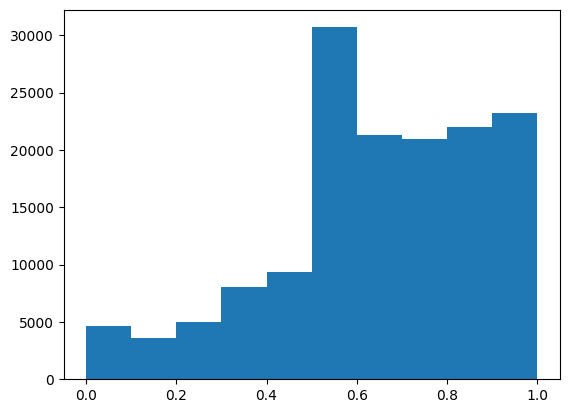

In [21]:
import matplotlib.pyplot as plt
plt.hist([row["quality"]["value"] for row in df["labels"] if "quality" in row])